# **Libraries**

In [ ]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
import random 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import RobustScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import datetime as dt
from sklearn.feature_selection import RFE
import scipy
from dtreeviz.trees import dtreeviz
import graphviz
from sklearn import tree
import pydotplus

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Cleaning**

### **Importing data**

In [ ]:
energyUsage = pd.read_csv('https://ml-ass2.s3.amazonaws.com/UCI_data.csv',header=0)
energyUsage.head()

date         T1       RH_1         T2       RH_2         T3  \
0  19/04/2016 20:30  22.200000  39.500000  20.566667  37.656667  22.230000   
1    5/03/2016 4:40  20.356667  37.126667  17.566667  40.230000  20.890000   
2  14/03/2016 12:40  20.926667  38.790000  21.100000  35.526667  21.600000   
3  22/01/2016 15:30  18.290000  38.900000  17.290000  39.260000  18.390000   
4   10/02/2016 0:40  22.290000  42.333333  21.600000  40.433333  22.666667   

        RH_3         T4       RH_4         T5  ...   RH_9  T_out  Press_mm_hg  \
0  37.030000  22.318571  36.610000  20.633333  ...  33.90   9.70   766.100000   
1  37.663333  18.700000  36.260000  18.463333  ...  41.09   0.30   740.333333   
2  36.290000  21.000000  34.826667  18.100000  ...  38.76   4.40   768.466667   
3  39.326667  16.100000  38.790000  16.100000  ...  39.20   3.35   760.600000   
4  43.363333  19.100000  40.900000  19.290000  ...  43.73   3.20   738.900000   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0    65.5   3.500000   40.000000   3.350000  24.061869  24.061869   
1    99.0   1.000000   41.333333   0.100000   4.622052   4.622052   
2    72.0   6.000000   22.666667  -0.266667   5.635898   5.635898   
3    82.0   5.500000   41.000000   0.500000  49.216445  49.216445   
4    88.0   7.333333   56.000000   1.400000  47.617579  47.617579   

   TARGET_energy  
0             60  
1             50  
2             80  
3             40  
4             60  

[5 rows x 28 columns]

In [ ]:
print(f"Shape of the dataset is {energyUsage.shape} \n")

Shape of the dataset is (19735, 28) 



### **Check for missing values**

In [ ]:
print(f"\nNumber of missing values for each feature:")
print(energyUsage.isnull().sum())


Number of missing values for each feature:
date             0
T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
dtype: int64


### **Check for data types**

In [ ]:
print(f"\nData type of each column of Dataframe:")
print(energyUsage.dtypes)


Data type of each column of Dataframe:
date              object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object


Transform the data type for `date` from `object` to `datetime`, so that this feature will be used for time series forecasting later on.

In [ ]:
energyUsage['date'] = pd.to_datetime(energyUsage['date'], format='%d/%m/%Y %H:%M')
energyUsage['date'].head()

0   2016-04-19 20:30:00
1   2016-03-05 04:40:00
2   2016-03-14 12:40:00
3   2016-01-22 15:30:00
4   2016-02-10 00:40:00
Name: date, dtype: datetime64[ns]

### **Rename columns for readability**

In [ ]:
energyUsage.rename(columns={'T1':'temp_kitchen'} ,inplace=True)
energyUsage.rename(columns={'RH_1':'hr_kitchen'} ,inplace=True)
energyUsage.rename(columns={'T2':'temp_livingroom'} ,inplace=True)
energyUsage.rename(columns={'RH_2':'hr_livingroom'} ,inplace=True)
energyUsage.rename(columns={'T3':'temp_laundryroom'} ,inplace=True)
energyUsage.rename(columns={'RH_3':'hr_laundryroom'} ,inplace=True)
energyUsage.rename(columns={'T4':'temp_officeroom'} ,inplace=True)
energyUsage.rename(columns={'RH_4':'hr_officeroom'} ,inplace=True)
energyUsage.rename(columns={'T5':'temp_bathroom'} ,inplace=True)
energyUsage.rename(columns={'RH_5':'hr_bathroom'} ,inplace=True)
energyUsage.rename(columns={'T6':'temp_outsideBuilding'} ,inplace=True)
energyUsage.rename(columns={'RH_6':'hr_outsideBuilding'} ,inplace=True)
energyUsage.rename(columns={'T7':'temp_ironingroom'} ,inplace=True)
energyUsage.rename(columns={'RH_7':'hr_ironingroom'} ,inplace=True)
energyUsage.rename(columns={'T8':'temp_teenagerroom2'} ,inplace=True)
energyUsage.rename(columns={'RH_8':'hr_teenagerroom2'} ,inplace=True)
energyUsage.rename(columns={'T9':'temp_parentsroom'} ,inplace=True)
energyUsage.rename(columns={'RH_9':'hr_parentsroom'} ,inplace=True)
energyUsage.rename(columns={'T_out':'temp_outside'} ,inplace=True)
energyUsage.rename(columns={'Press_mm_hg':'pressure'} ,inplace=True)
energyUsage.rename(columns={'RH_out':'hr_outside'} ,inplace=True)
energyUsage.rename(columns={'Windspeed':'wind_speed'} ,inplace=True)
energyUsage.rename(columns={'Visibility':'visibility'} ,inplace=True)
energyUsage.rename(columns={'Tdewpoint':'temp_dewPoint'} ,inplace=True)
energyUsage.rename(columns={'TARGET_energy':'energy'} ,inplace=True)

In [ ]:
energyUsage.columns

Index(['date', 'temp_kitchen', 'hr_kitchen', 'temp_livingroom',
       'hr_livingroom', 'temp_laundryroom', 'hr_laundryroom',
       'temp_officeroom', 'hr_officeroom', 'temp_bathroom', 'hr_bathroom',
       'temp_outsideBuilding', 'hr_outsideBuilding', 'temp_ironingroom',
       'hr_ironingroom', 'temp_teenagerroom2', 'hr_teenagerroom2',
       'temp_parentsroom', 'hr_parentsroom', 'temp_outside', 'pressure',
       'hr_outside', 'wind_speed', 'visibility', 'temp_dewPoint', 'rv1', 'rv2',
       'energy'],
      dtype='object')

### **Extracting components from date**

In [ ]:
energyUsage.rename(columns={'date':'datetime'}, inplace=True)

energyUsage['month'] = pd.DatetimeIndex(energyUsage['datetime']).month
energyUsage['week'] = pd.DatetimeIndex(energyUsage['datetime']).week
energyUsage['dayofweek'] = pd.DatetimeIndex(energyUsage['datetime']).dayofweek
energyUsage['dayofmonth'] = pd.DatetimeIndex(energyUsage['datetime']).day
energyUsage['hour'] = pd.DatetimeIndex(energyUsage['datetime']).hour
energyUsage['date'] = pd.DatetimeIndex(energyUsage['datetime']).date
energyUsage['typeofday'] = np.where(energyUsage['dayofweek'] < 5, 'weekday', 'weekend')
energyUsage['date'] = pd.to_datetime(energyUsage['date'], format='%Y-%m-%d')

energyUsage.month -= 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [ ]:
cols = ['datetime', 'date', 'month', 'week', 'dayofmonth', 'hour', 'typeofday', 'dayofweek']
energyUsage[cols].head()

datetime       date  month  week  dayofmonth  hour typeofday  \
0 2016-04-19 20:30:00 2016-04-19      3    16          19    20   weekday   
1 2016-03-05 04:40:00 2016-03-05      2     9           5     4   weekend   
2 2016-03-14 12:40:00 2016-03-14      2    11          14    12   weekday   
3 2016-01-22 15:30:00 2016-01-22      0     3          22    15   weekday   
4 2016-02-10 00:40:00 2016-02-10      1     6          10     0   weekday   

   dayofweek  
0          1  
1          5  
2          0  
3          4  
4          2

### **Create float variables from date objects**

**Comments**: The DateTime cannot be trained with some models so that extra variables with DateTime as float type will be added

In [ ]:
energyUsage['date_float']=energyUsage['date'].map(dt.datetime.toordinal)
energyUsage['datetime_float']=energyUsage['datetime'].map(dt.datetime.toordinal)

### **Detect outliers**

As observed from the box plot for all features relating temperature, the outliers come from `temp_kitchen`, `temp_livingroom`, `temp_laundryroom`, `temp_officeroom`, `temp_bathroom`, `temp_outsideBuilding`, `temp_ironingroom`, `temp_teenagerroom2`, `temp_outside`. They are remained as falling within possible ranges (15°C to 25°C or up to 30°C).

The outside temperatures also fall below the highest temperature recorded (at around 40°C).

In terms of dew point, the outliers are at around 15°C which is normal, indicated as dry and comfortable.

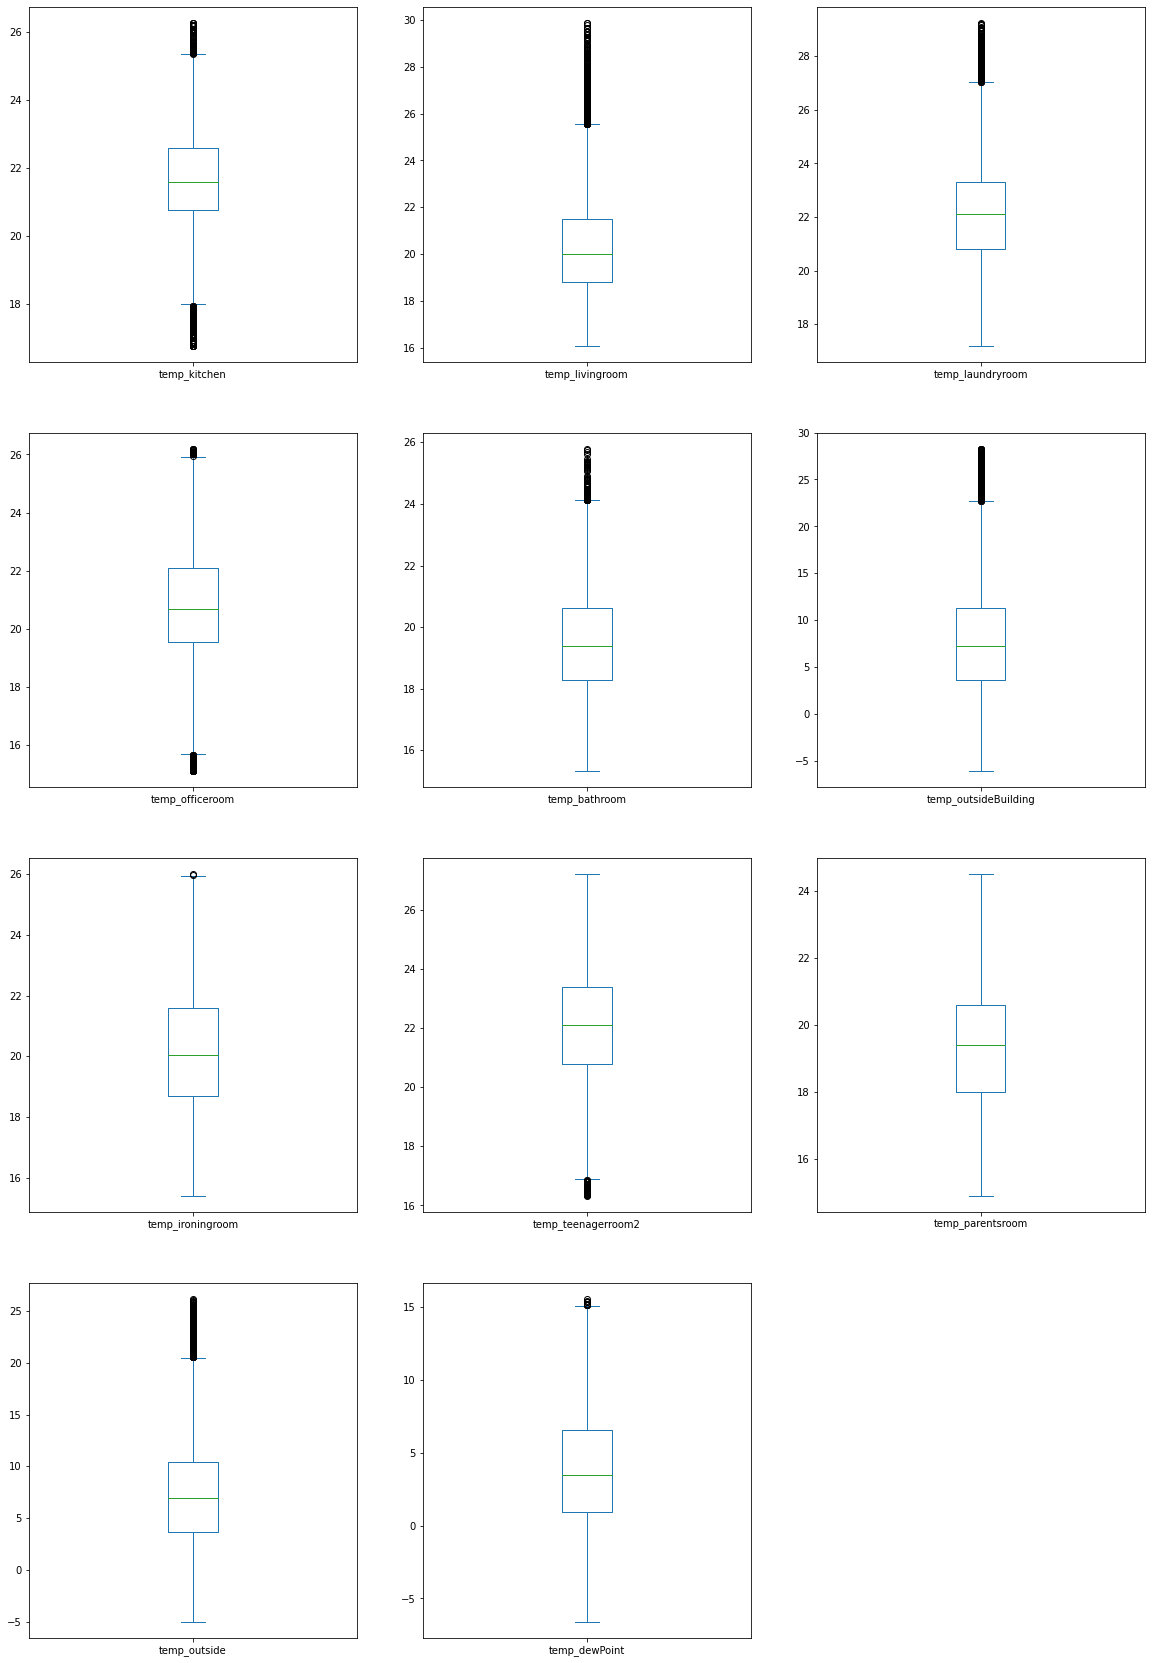

In [ ]:
cols = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
        'temp_officeroom', 'temp_bathroom', 'temp_outsideBuilding',
        'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
        'temp_outside', 'temp_dewPoint']
energyUsage[cols].plot(kind='box', subplots=True, layout=(4,3), figsize=(20,30))
plt.show()

The box plot for features relating humidity shows that outliers are from `hr_kitchen`, `hr_livingroom`, `hr_laundryroom`, `hr_bathroom`, `hr_ironingroom`, `hr_teenagerroom2`, `hr_parentsroom`, `hr_outside`. They are all kept as falling within possible ranges for in-room and outside humidity (20 to 60%).

For the bathroom, the humidity is higher, reaching nearly 100%. However, it is also possible as the humidity increases while having a shower.

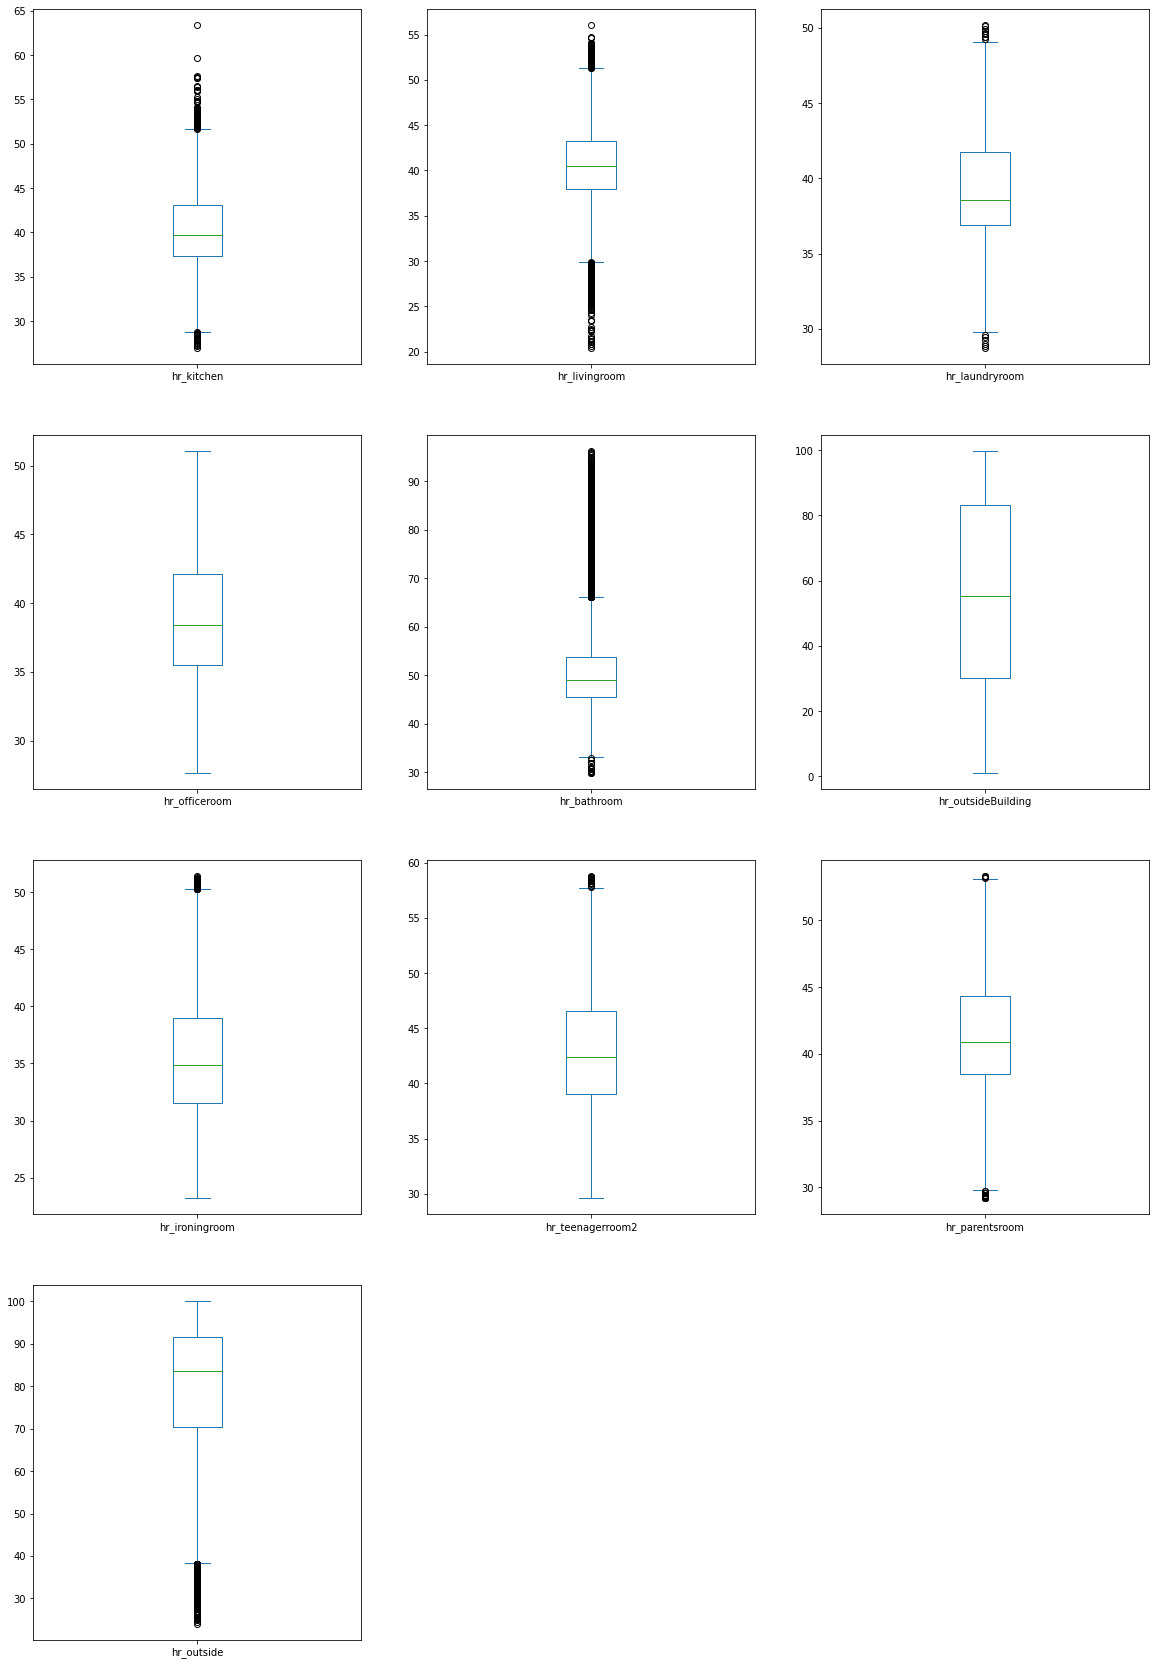

In [ ]:
cols = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
        'hr_officeroom', 'hr_bathroom', 'hr_outsideBuilding',
        'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
        'hr_outside']
energyUsage[cols].plot(kind='box', subplots=True, layout=(4,3), figsize=(20,30))
plt.show()

The outliers come from `pressure`, `wind_speed` and `visibility`. 

Outliers from `pressure` are kept as it is possible to fall below 740 mmHg, indicating that the weather is stormy.

Similarly, outliers from `wind_speed` remain as they are equal to or below 14 m/s. It means a strong breeze with low atmospheric pressure.

Outliers from `visibility` are kept. In terms of those with extremely low values, it is observed that the corresponding outside humidity is relatively high. As a result, it is possible for the poor visibility while raining. On the other hand, the excellent visibility is indicated as over 40 km, then those with high values are also normal. 

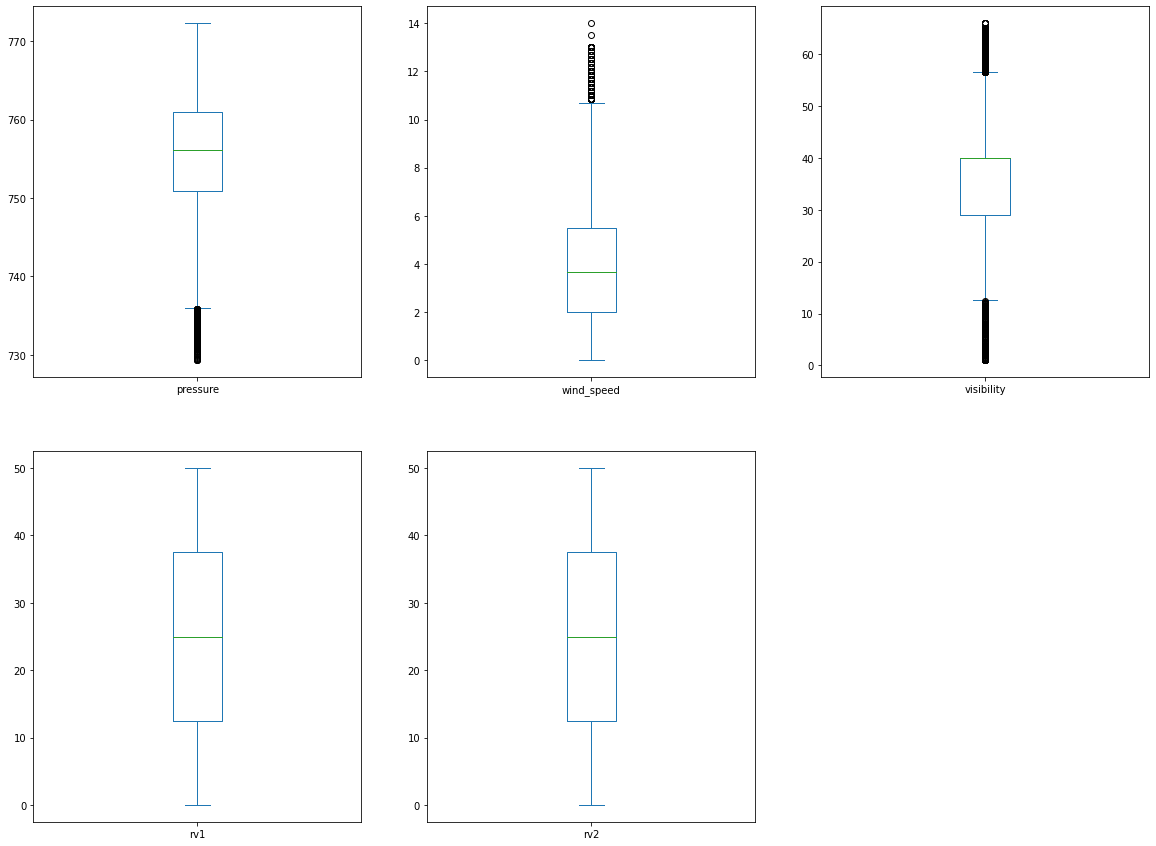

In [ ]:
cols = ['pressure', 'wind_speed', 'visibility',
        'rv1', 'rv2']
energyUsage[cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(20,15))
plt.show()

### **Categorical Variables Encoding**

In [ ]:
energyUsage.typeofday = energyUsage.typeofday.replace({"weekday": 0, "weekend": 1})

In [ ]:
print(energyUsage.dtypes)

datetime                datetime64[ns]
temp_kitchen                   float64
hr_kitchen                     float64
temp_livingroom                float64
hr_livingroom                  float64
temp_laundryroom               float64
hr_laundryroom                 float64
temp_officeroom                float64
hr_officeroom                  float64
temp_bathroom                  float64
hr_bathroom                    float64
temp_outsideBuilding           float64
hr_outsideBuilding             float64
temp_ironingroom               float64
hr_ironingroom                 float64
temp_teenagerroom2             float64
hr_teenagerroom2               float64
temp_parentsroom               float64
hr_parentsroom                 float64
temp_outside                   float64
pressure                       float64
hr_outside                     float64
wind_speed                     float64
visibility                     float64
temp_dewPoint                  float64
rv1                      

In [ ]:
cols = ['typeofday', 'date']
energyUsage[cols].head()

typeofday       date
0          0 2016-04-19
1          1 2016-03-05
2          0 2016-03-14
3          0 2016-01-22
4          0 2016-02-10

### **Explanatory variables**

* *temp_kitchen*: Temperature in kitchen area: **Celsius**.
* *hr_kitchen*: Humidity in kitchen area: **%**.
* *temp_livingroom*: Temperature in living room area: **Celsius**.
* *hr_livingroom*: Humidity in living room area **%**.
* *temp_laundryroom*: Temperature in laundry room area: **Celsius**.
* *hr_laundryroom*: Humidity in laundry room area: **%**.
* *temp_officeroom*: Temperature in office room area: **Celsius**.
* *hr_officeroom*: Humidity in office room area: **%**.
* *temp_bathroom*: Temperature in bathroom area: **Celsius**.
* *hr_bathroom*: Humidity in bathroom area: **%**.
* *temp_outsideBuilding*: Temperature outside the building (north side): **Celsius**.
* *hr_outsideBuilding*: Humidity outside the building (north side): **%**.
* *temp_ironingroom*: Temperature in ironing room area: **Celsius**.
* *hr_ironingroom*: Humidity in ironing room area: **%**.
* *temp_teenagerroom2*: Temperature in teenager room 2 area: **Celsius**.
* *hr_teenagerroom2*: Humidity in teenager room 2 area: **%**.
* *temp_parentsroom*: Temperature in parents room area: **Celsius**.
* *hr_parentsroom*: Humidity in parents room area: **%**.
* *temp_outside*: Temperature outside (from Chievres weather station): **Celsius**.
* *hr_outside*: Humidity outside (from Chievres weather station): **%**.
* *pressure*: Atmospheric pressure (from Chievres weather station): **mm Hg**.
* *wind_speed*: Wind speed (from Chievres weather station): **m/s**.
* *visibility*: Visibility (from Chievres weather station): **km**.
* *temp_dewPoint*: Dew point (from Chievres weather station): **Celsius**.
* *rv1*: Random variable 1, nondimensional.
* *rv2*: Random variable 2, nondimensional.
* *datetime*: Date time: **year-month-day hour:minute:second**.
* *date*: Date: **year-month-day**.
* *month*: Month: **0 to 11**: **January to December**.
* *week*: Week of a year: **weeks**.
* *dayofmonth*: Day of a month: **days**.
* *hour*: Hour of a day: **hours**.
* *typeofday*: Type of day: **0**: **weekday**, **1**: **weekend**.
* *dayofweek*: Day of a week: **0 to 6**: **Moday to Sunday**.


### **Target variable**

*energy*: energy use of appliances and light fixtures in the house: **Wh**.

# **Exploratory Data Analysis**

### **Summary of features**

##### **Summary of temperature features**

Temperatures inside the house vary between 14.89°C to 29.86°C, and average temperatures also range from nearly 20°C to around 22°C.

Outside temperatures vary between -6.06°C to 28.29°C, with an average of approximately 8°C.

The dew point temperature is always less than the outside temperature. To be more precise, it varies from -6.6°C to 15.5°C with an average of 3.76°C.

In [ ]:
features = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
            'temp_officeroom', 'temp_bathroom', 'temp_outsideBuilding',
            'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
            'temp_outside', 'temp_dewPoint']
display(HTML('<b>Table 1: Summary of temperature features</b>'))
energyUsage[features].describe()

temp_kitchen  temp_livingroom  temp_laundryroom  temp_officeroom  \
count  19735.000000     19735.000000      19735.000000     19735.000000   
mean      21.686571        20.341219         22.267611        20.855335   
std        1.606066         2.192974          2.006111         2.042884   
min       16.790000        16.100000         17.200000        15.100000   
25%       20.760000        18.790000         20.790000        19.530000   
50%       21.600000        20.000000         22.100000        20.666667   
75%       22.600000        21.500000         23.290000        22.100000   
max       26.260000        29.856667         29.236000        26.200000   

       temp_bathroom  temp_outsideBuilding  temp_ironingroom  \
count   19735.000000          19735.000000      19735.000000   
mean       19.592106              7.910939         20.267106   
std         1.844623              6.090347          2.109993   
min        15.330000             -6.065000         15.390000   
25%        18.277500              3.626667         18.700000   
50%        19.390000              7.300000         20.033333   
75%        20.619643             11.256000         21.600000   
max        25.795000             28.290000         26.000000   

       temp_teenagerroom2  temp_parentsroom  temp_outside  temp_dewPoint  
count        19735.000000      19735.000000  19735.000000   19735.000000  
mean            22.029107         19.485828      7.411665       3.760707  
std              1.956162          2.014712      5.317409       4.194648  
min             16.306667         14.890000     -5.000000      -6.600000  
25%             20.790000         18.000000      3.666667       0.900000  
50%             22.100000         19.390000      6.916667       3.433333  
75%             23.390000         20.600000     10.408333       6.566667  
max             27.230000         24.500000     26.100000      15.500000

##### **Summary of humidity features**

In-house humidities vary between 20.46% and 63.36%, except for the bathroom humidity having a maximum of 96.32%. Undoubtedly, the bathroom's average humidity falls at a higher level of 50.95% than that of other rooms (from 35.39% to 42.94%).

By contrast, the outside humidity is relatively higher. Specifically, it varies from 24% to 100% and 1% to 99.9% for outside and outside the building respectively.

In [ ]:
features = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
            'hr_officeroom', 'hr_bathroom', 'hr_outsideBuilding',
            'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
            'hr_outside']
display(HTML('<b>Table 2: Summary of humidity features</b>'))
energyUsage[features].describe()

hr_kitchen  hr_livingroom  hr_laundryroom  hr_officeroom  \
count  19735.000000   19735.000000    19735.000000   19735.000000   
mean      40.259739      40.420420       39.242500      39.026904   
std        3.979299       4.069813        3.254576       4.341321   
min       27.023333      20.463333       28.766667      27.660000   
25%       37.333333      37.900000       36.900000      35.530000   
50%       39.656667      40.500000       38.530000      38.400000   
75%       43.066667      43.260000       41.760000      42.156667   
max       63.360000      56.026667       50.163333      51.090000   

        hr_bathroom  hr_outsideBuilding  hr_ironingroom  hr_teenagerroom2  \
count  19735.000000        19735.000000    19735.000000      19735.000000   
mean      50.949283           54.609083       35.388200         42.936165   
std        9.022034           31.149806        5.114208          5.224361   
min       29.815000            1.000000       23.200000         29.600000   
25%       45.400000           30.025000       31.500000         39.066667   
50%       49.090000           55.290000       34.863333         42.375000   
75%       53.663333           83.226667       39.000000         46.536000   
max       96.321667           99.900000       51.400000         58.780000   

       hr_parentsroom    hr_outside  
count    19735.000000  19735.000000  
mean        41.552401     79.750418  
std          4.151497     14.901088  
min         29.166667     24.000000  
25%         38.500000     70.333333  
50%         40.900000     83.666667  
75%         44.338095     91.666667  
max         53.326667    100.000000

##### **Summary of weather features**

* Pressure varies from 729.30 to 772.30 mmHg
* Wind speed varies from 0 to 14 m/s
* Visibility varies from 1 to 66 km

* **`pressure` has different ranges from other features, indicating that feature scaling is needed**

In [ ]:
features = ['pressure', 'wind_speed', 'visibility']
display(HTML('<b>Table 3: Summary of other features</b>'))
energyUsage[features].describe()

pressure    wind_speed    visibility
count  19735.000000  19735.000000  19735.000000
mean     755.522602      4.039752     38.330834
std        7.399441      2.451221     11.794719
min      729.300000      0.000000      1.000000
25%      750.933333      2.000000     29.000000
50%      756.100000      3.666667     40.000000
75%      760.933333      5.500000     40.000000
max      772.300000     14.000000     66.000000

##### **Summary of target feature**

The average appliance consumption is around 101 Wh. However, the maximum energy is 1110 Wh, indicating a small number of cases where the consumption is extremely high.

In [ ]:
display(HTML('<b>Table 4: Summary of target feature</b>'))
energyUsage['energy'].describe()

count    19735.000000
mean       101.496833
std        104.380829
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1110.000000
Name: energy, dtype: float64

### **Explore each column**

######Explore distribution for each **temperature** variable

**Comments:**
* The distribution of temperature varibales are pretty close to normal distributions.

* The below variables are relatively skewed as compared to a highly normal distribution:

 * `temp_livingroom` is skewed to the right
 * `temp_officeroom` is skewed to the left
 * `temp_bathroom` is skewed to the right
 * `temp_outsideBuilding` is skewed to the right
 * `temp_teenageroom2` is skewed to the left
 * `temp_parentsroom` is skewed to the right
 * `temp_outside` is skewed to the right




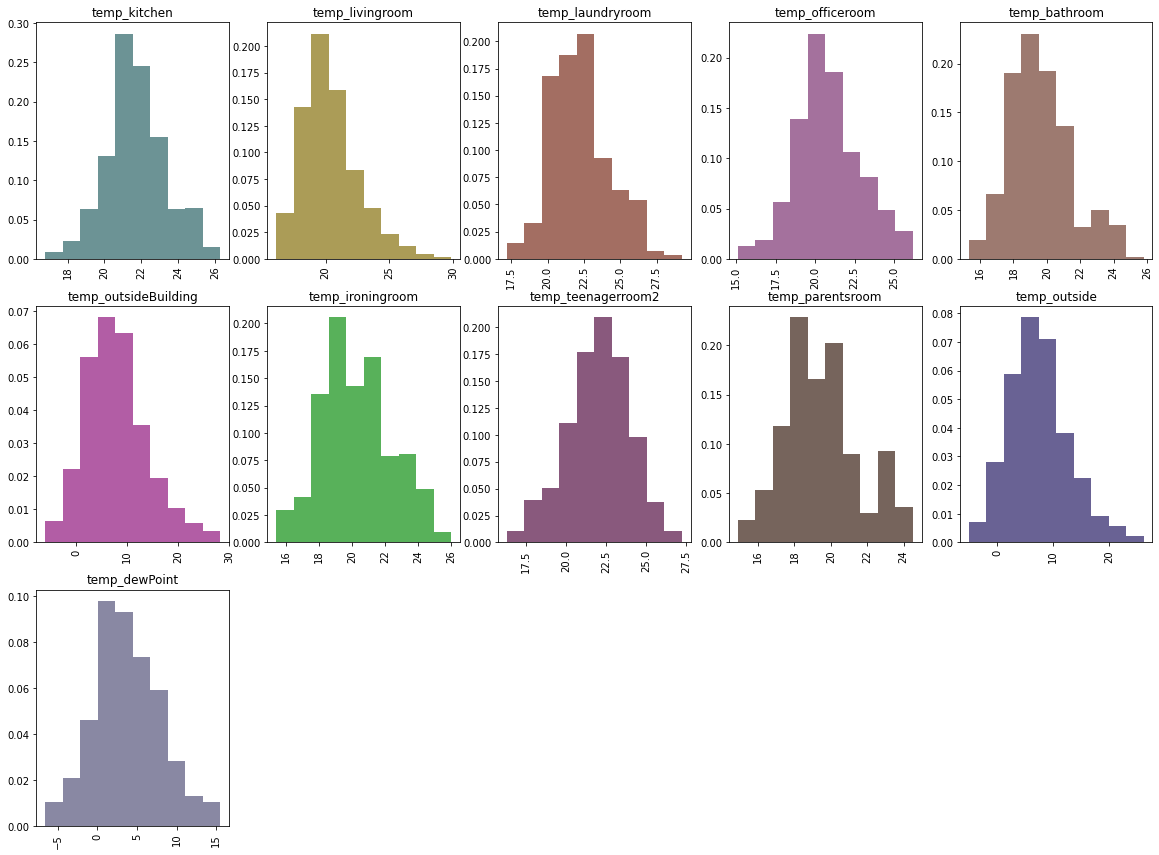

In [ ]:
#EDA: explore temperature distributions

cols = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
            'temp_officeroom', 'temp_bathroom', 'temp_outsideBuilding',
            'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
            'temp_outside', 'temp_dewPoint']

plt.figure(figsize=(20,20))
for i, col in enumerate(energyUsage[cols].columns):

    r = random.uniform(0.3, 0.7)
    b = random.uniform(0.3, 0.7)
    g = random.uniform(0.3, 0.7)
    color = (r, g, b)

    plt.subplot(4,5,i+1)
    plt.hist(energyUsage[col], alpha=1, color=color, density=True)
    plt.title(col)
    plt.xticks(rotation='vertical') 

###### Explore distribution of **temperature** variables in the same temperature scale

**Comments:**

* The outside temperatures (`temp_outsideBuilding`, `temp_outside`,`temp_dewPoint`) are similar in range (centered around 0 - 10 Celsius)
* The inside temperatures *(all others)* are similar in range as well (centered around 17-23 celsius)
* The outside temperature variables are all lower compared to the inside temperatures (visually established below)


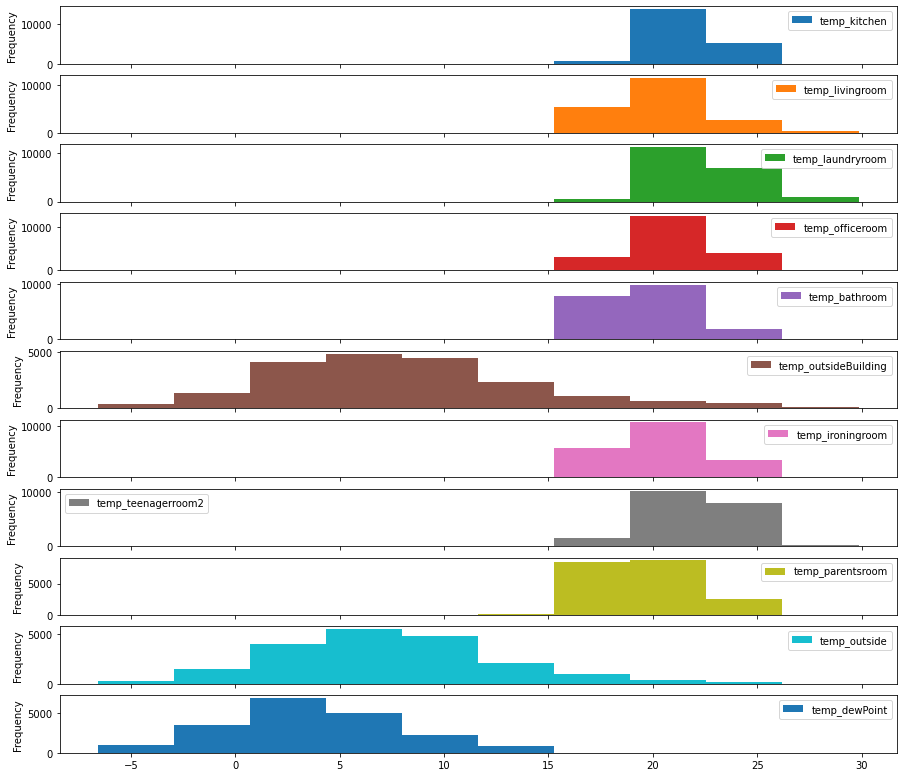

In [ ]:
energyUsage[cols].plot(kind='hist', subplots=True, layout=(12,1), figsize=(15,15))
plt.show()

#####Explore distribution for each **humidity** variable


**Comments:**

* `hr_kitchen`, `hr_livingroom`, `hr_ironingroom`, `hr_teenageroom`, `hr_parentsroom` are distributed close to a normal distribution
* `hr_laundryroom`, `hr_bathroom`, `hr_officeroom` are skewed to the right
* `hr_outside` is skewed to the left
* `hr_outsideBuilding` is closer to a uniform distribution, than a normal distribution

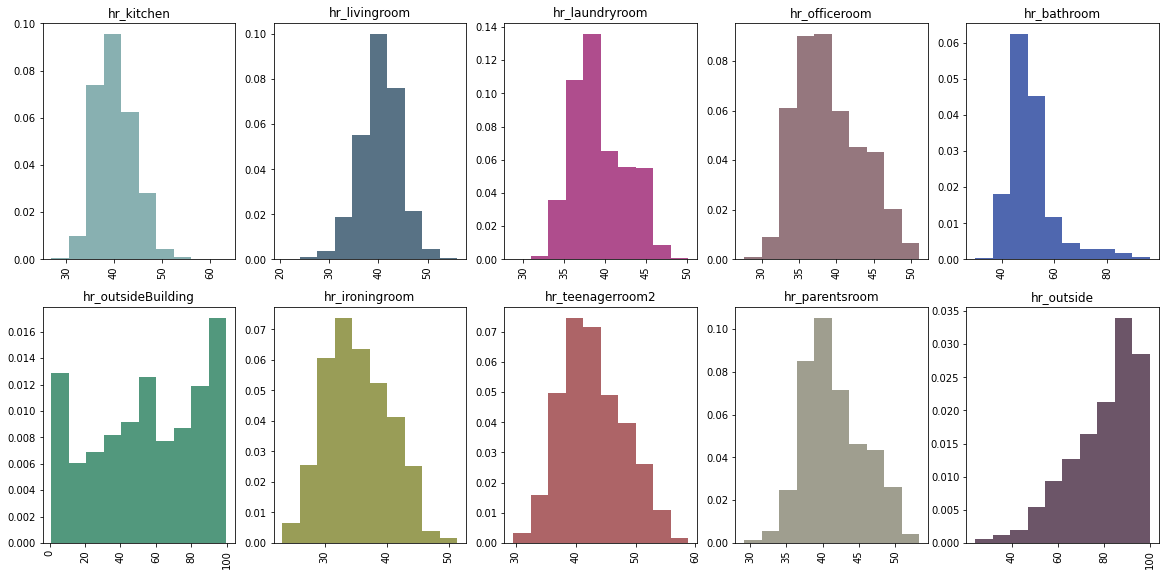

In [ ]:
cols = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
            'hr_officeroom', 'hr_bathroom', 'hr_outsideBuilding',
            'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
            'hr_outside']

plt.figure(figsize=(20,20))
for i, col in enumerate(energyUsage[cols].columns):

    r = random.uniform(0.3, 0.7)
    b = random.uniform(0.3, 0.7)
    g = random.uniform(0.3, 0.7)
    color = (r, g, b)

    plt.subplot(4,5,i+1)
    plt.hist(energyUsage[col], alpha=1, color=color, density=True)
    plt.title(col)
    plt.xticks(rotation='vertical') 

##### Explore distribution of **humidity** variables in the same humidity scale

**Comments:**

* All the inside rooms have the same humidity range (centering 40)
 * `hr_bathroom` has slightly higher humidity (due to obviously more water content)
 * `hr_ironingroom` has slightly lower humidity 
* `hr_outside` is higher, ranging (20, 100) and is skewed towards the upper limit
* `hr_outsideBuilding` varies equally from 0 to 100 (close to a uniform distribution)

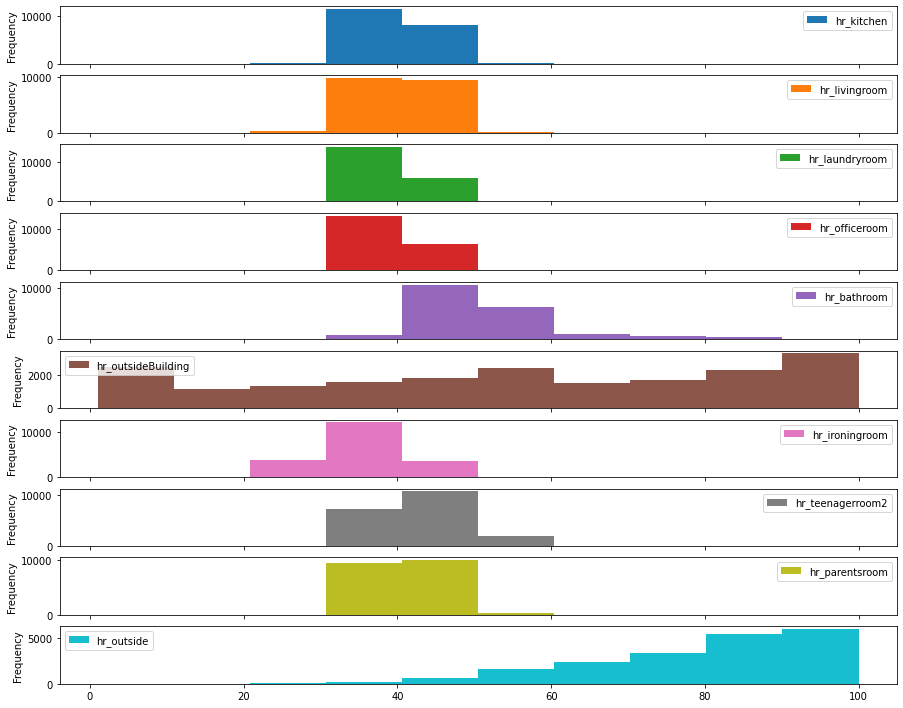

In [ ]:
energyUsage[cols].plot(kind='hist', subplots=True, layout=(12,1), figsize=(15,15))
plt.show()

##### Exploration of weather variables

**Comments:**

* `pressure` is slightly left skewed
* `wind_speed` is slightly right skewed
* `visibility` is close to a random distribution with majority values in the range of (20, 40)

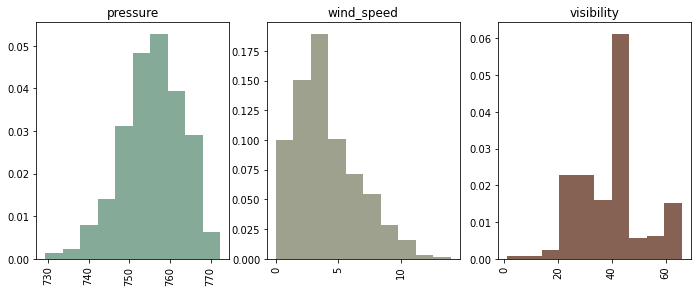

In [ ]:
cols = ['pressure', 'wind_speed', 'visibility']

plt.figure(figsize=(20,20))
for i, col in enumerate(energyUsage[cols].columns):

    r = random.uniform(0.3, 0.7)
    b = random.uniform(0.3, 0.7)
    g = random.uniform(0.3, 0.7)
    color = (r, g, b)

    plt.subplot(4,5,i+1)
    plt.hist(energyUsage[col], alpha=1, color=color, density=True)
    plt.title(col)
    plt.xticks(rotation='vertical') 

#####Exploration of target variable

**Comments:**
* `energy` (target variable) is highly skewed to the right with lot of values centering close to (0, 100) with outliers upto (800, 1000)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

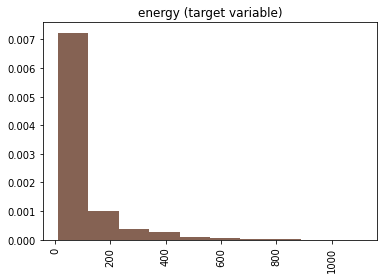

In [ ]:
    plt.hist(energyUsage['energy'], alpha=1, color=color, density=True)
    plt.title('energy (target variable)')
    plt.xticks(rotation='vertical') 

#####Exploration of time variables

**Comments:**
Most of the time components vary equally (close to a uniform distribution)

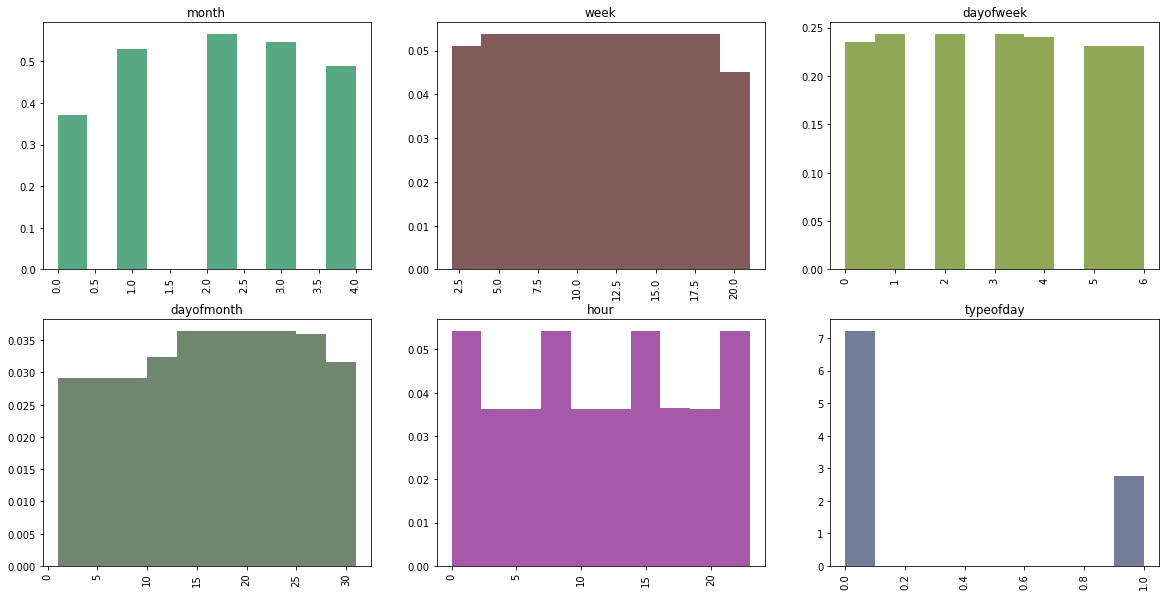

In [ ]:
cols = ['month', 'week', 'dayofweek', 'dayofmonth', 'hour', 'typeofday']

plt.figure(figsize=(20,10))
for i, col in enumerate(energyUsage[cols].columns):

    r = random.uniform(0.3, 0.7)
    b = random.uniform(0.3, 0.7)
    g = random.uniform(0.3, 0.7)
    color = (r, g, b)

    plt.subplot(2,3,i+1)
    plt.hist(energyUsage[col], alpha=1, color=color, density=True)
    plt.title(col)
    plt.xticks(rotation='vertical') 

### **Explore variable relationships**

* We will use 2 types of visualizations for variable interactions
 * The scatter plots are used to understand variable interactions visually
 * Next section on correlation plots detail out the significant relationships among these variables
* Observational comments are provided together under the correlation section

#### Scatter plots between the variables

**Comments**

* Temperature variables:
  * The inside temperature variables (inside the house) have a strong positive linear relationship with each other
  * The outside temperature variables (outside the house) also have a strong positive linear relationship with each other
* Humidity variables:
 * The indoor humidity variables (except for `hr_bathroom`) have a strong positive linear relationship with each other
 * The outside humidity variables (outside the house) have a weak positive linear relationship with each other

In [ ]:
plt.figure(figsize=(40,900))

col_choice = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
            'temp_officeroom', 'temp_bathroom', 'temp_outsideBuilding',
            'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
            'temp_outside', 'temp_dewPoint', 'hr_kitchen', 'hr_livingroom', 
            'hr_laundryroom', 'hr_officeroom', 'hr_bathroom', 'hr_outsideBuilding',
            'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
            'hr_outside', 'pressure', 'wind_speed', 'visibility', 'energy']

i=0

for pos, axis1 in enumerate(col_choice):   # Pick a first col
    for pos2, axis2 in enumerate(col_choice[pos+1:]):   # Pick a later col
        
        i = i + 1
        r = random.uniform(0.3, 0.7)
        b = random.uniform(0.3, 0.7)
        g = random.uniform(0.3, 0.7)
        color = (r, g, b)
        plt.subplot(150,4,i)

        plt.scatter(energyUsage.loc[:, axis1], energyUsage.loc[:, axis2], color = color)
        plt.xlabel(axis1)
        plt.ylabel(axis2)


Output hidden; open in https://colab.research.google.com to view.

#### Correlation matrix between the variables

**Comments**

*   The temperature variables are all strongly correlated with each other
 * The inside temperature variables (inside the house) are highly correlated with each other
 * outside temperature variables (outside the house) are highly correlated with each other
*   The humidity variables are also strongly correlated among themselves
 * The inside humidity variables (inside the house) are highly correlated with each other
 * The outside humidity variables (outside the house) are highly correlated with each other
* `hr_outsideBuilding` is strongly negatively correlated with multiple temperature variables (specially `temp_ironingroom`, `temp_parentsroom`)
* `hr_outside` is strongly negatively correlating with few temperature variables (`temp_outside`, `temp_outsideBuilding`, `temp_livingroom`)
* `pressure` and `wind_speed` has a slightly negative correlation (-0.24)
* The target variable `energy`:
 * Has a slightly positive correlation with `wind_speed` (0.090)
 * Has a positive correlation with the temperatures, especially the `temp_outsideBuilding` (0.11)
 * Has a positive correlation with `hr_kitchen` (0.093), `hr_laundryroom` (0.046). There is also a small correlation with the `hr_officeroom` (0.025) and the `hr_bathroom` (0.018). However, a different behaviour (negative correlation) is obtained with the `hr_livingroom` (-0.056), `hr_ironingroom` (-0.052), etc.



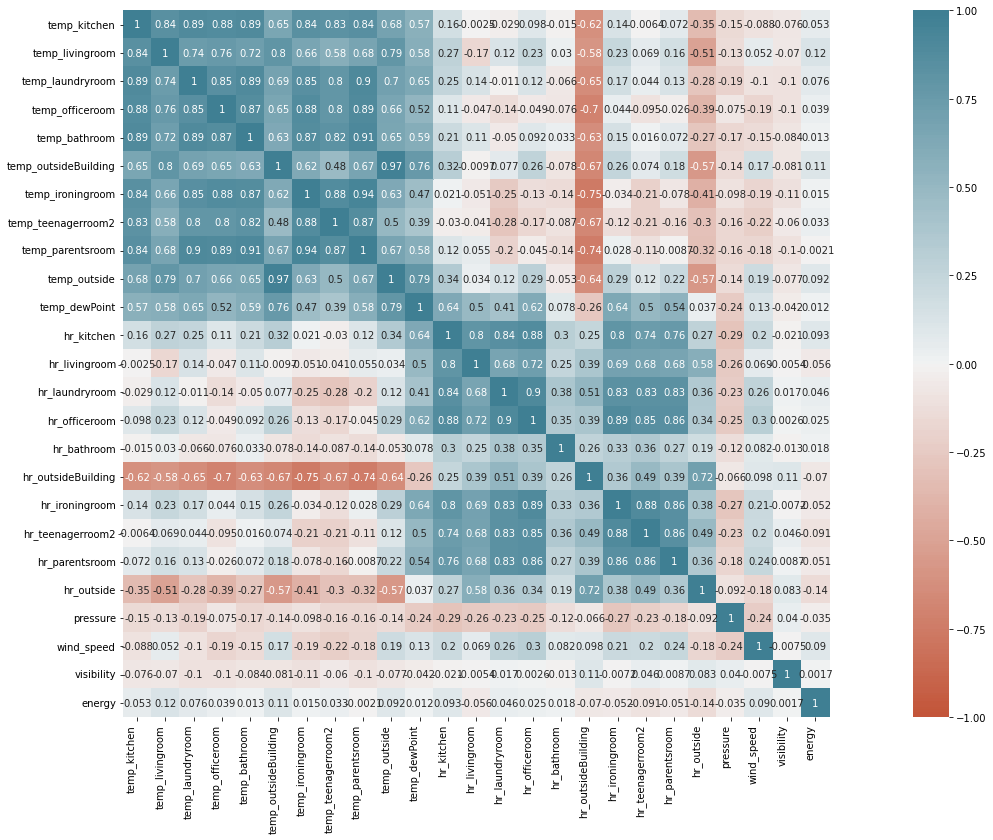

In [ ]:
f, ax = plt.subplots(figsize=(30, 13))
corr = energyUsage[col_choice].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True, fmt='.2g'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

### **Explore relationships across time** (*parallel line graphs*)

1. Using full time series

 * *Comments to be added for each block of code below*

2. Using aggregate time components day/month/year/weekday etc.

 * *Comments to be added for each block of code below*

#### Explore time relationships for temperature variables

In [ ]:
#sort the data in ascending order (time series order) for time series analysis
energyUsage.sort_values('datetime', inplace=True, ascending=True)

##### Explore using full time series

**Comments**

* There is an upward trend in all the temperature variables
* There is a horizontal trend and irregular change in `energy` (target variable)
* No relationship is obtained between `energy` and temperature variables across the timeline

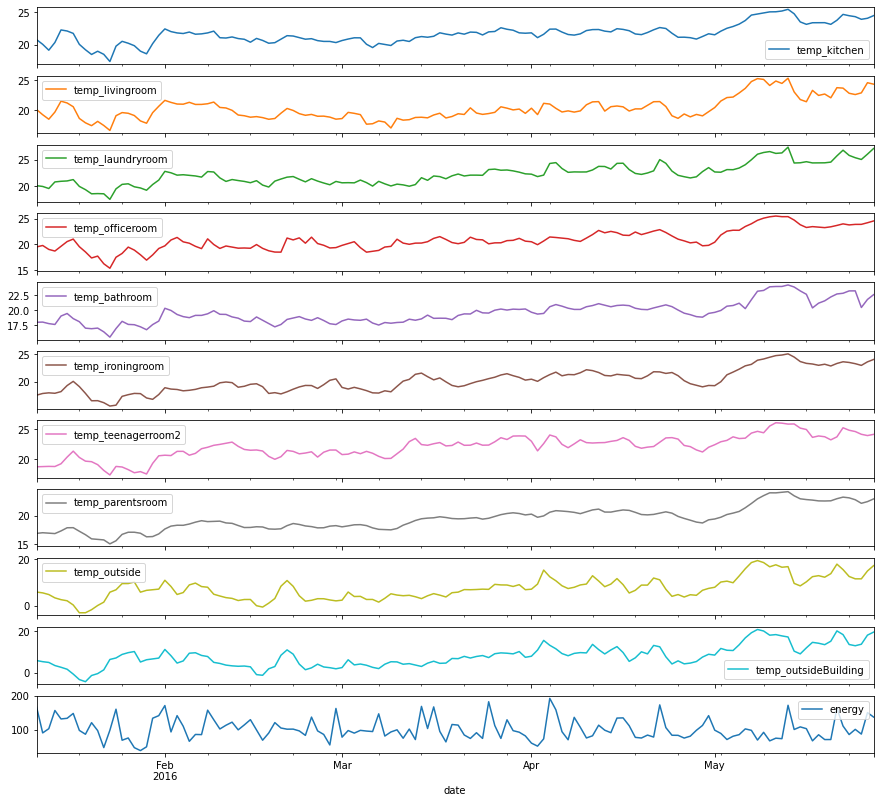

In [ ]:
#explore temperature variables across time and compare with target variable (energy) across the timeline

cols = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
        'temp_officeroom', 'temp_bathroom',
        'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
        'temp_outside', 'temp_outsideBuilding', 'energy', 'date']

energyUsage[cols].groupby('date').mean().plot(kind='line', subplots=True, layout=(12,1), figsize=(15,15))
plt.xticks(rotation = 45)
plt.show()

##### Explore 7-day rolling averages

**Comments**

* There is an uptrend for all temperature variables. Without noise, it seems to be irregular
* There is an irregular change in `energy` (target variable). The highest usage of energy was recoreded in the first month of 2016
* No relationship is obtained between `energy` and temperature variables across the timeline

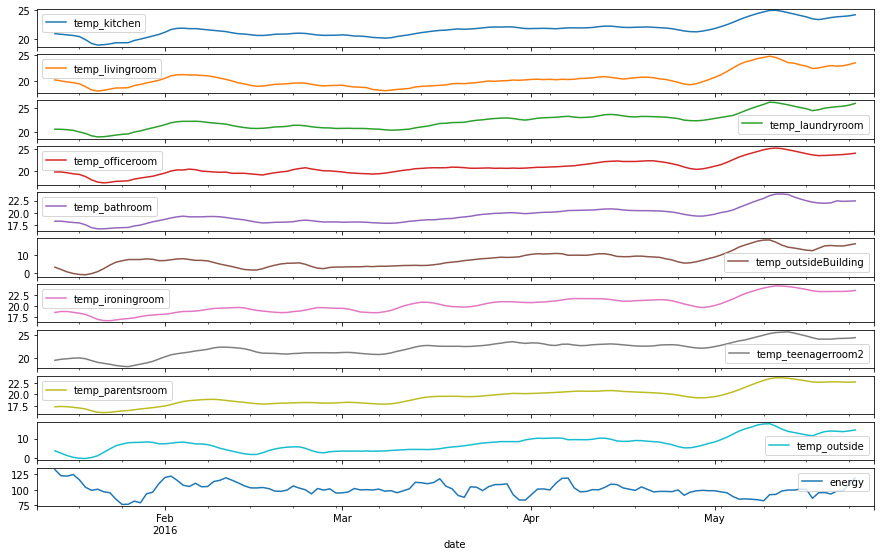

In [ ]:
#explore 7-day rolling averages to level out the noise in the daily trends in temperature and energy usage

#This is also a proxy for plotting the temperature and energy metrics by the 'week' column, 
#and it provides an understanding of intra-week changes too 

cols = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
            'temp_officeroom', 'temp_bathroom', 'temp_outsideBuilding',
            'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
            'temp_outside', 'energy', 'date']

energyUsage[cols].groupby('date').mean().rolling(7).mean().shift(-3).plot(kind='line', layout=(12,1), figsize=(15,10),subplots=True)
plt.xticks(rotation = 45)
plt.show()

##### Explore day of week

**Comments**

* The indoor temperature variables decrease on Saturday, then increasing on Sunday and Monday (except for `temp_officeroom`)
* The outside temperature variables decrease from Tuesday to Thursday, then increasing between Friday and Monday
* The highest usage of energy was recorded on Monday, then fluctuating the whole week
* **Intuitively, there doesn't seem any weekly trend**

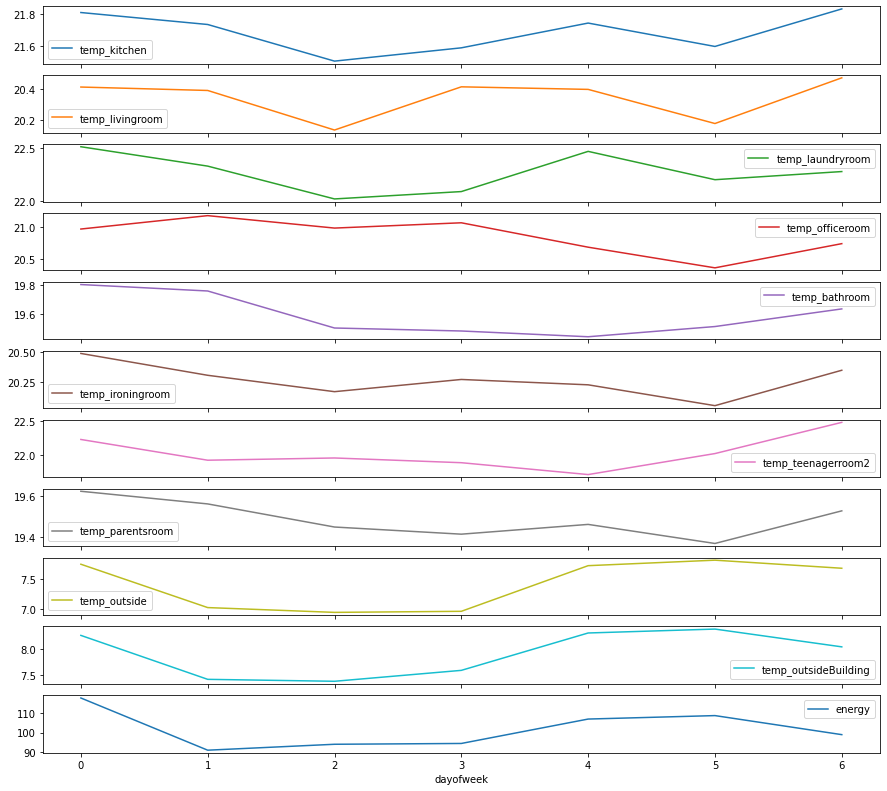

In [ ]:
#explore day of week (0-monday to 7-sunday) trends in temperature and energy usage

cols = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
            'temp_officeroom', 'temp_bathroom',
            'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
            'temp_outside', 'temp_outsideBuilding', 'energy', 'dayofweek']

energyUsage[cols].groupby('dayofweek').mean().plot(kind='line', subplots=True, layout=(12,1), figsize=(15,15))
plt.xticks([0,1,2,3,4,5,6], labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


##### Explore day of month

**Comments**

* The inside temperatures remain stable for the whole month
* Energy consumption peaks in the middle of the month (from **14th to 16th**)
* Overall, it looks like **the higher the outside temperatures are, the higher the energy is consumed**

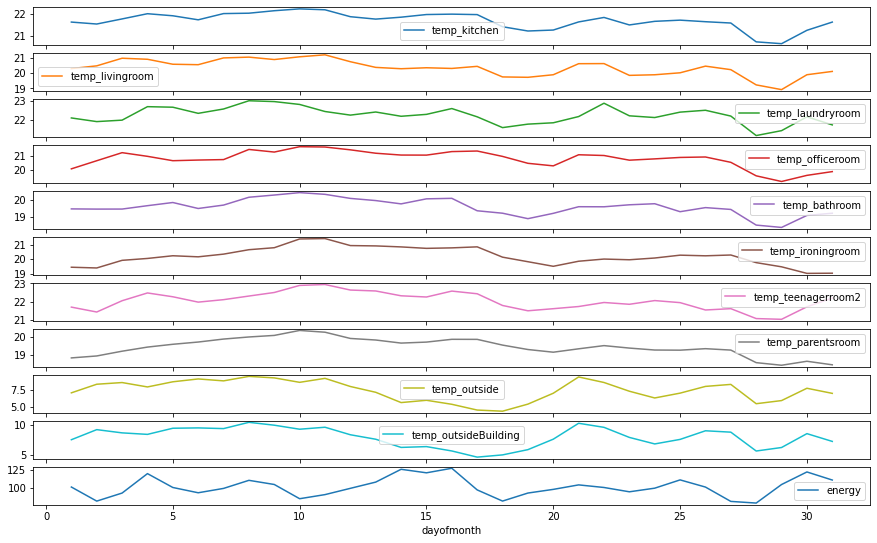

In [ ]:
#explore day of month (0 - 30/31) trends in temperature and energy usage

cols = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
            'temp_officeroom', 'temp_bathroom',
            'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
            'temp_outside', 'temp_outsideBuilding', 'energy', 'dayofmonth']

energyUsage[cols].groupby('dayofmonth').mean().plot(kind='line', layout=(12,1), figsize=(15,10),subplots=True)
plt.xticks(np.arange(1, 30, 1))
plt.show()


##### Explore month-level

**Comments**

* The inside temperatures slightly increase from January to May
* The outside temperatures also slightly increase from January to March, then the rise is more significant between April and May
* Overall, there is a **downward trend in the energy consumption over 5 months**, following a **seasonal pattern**

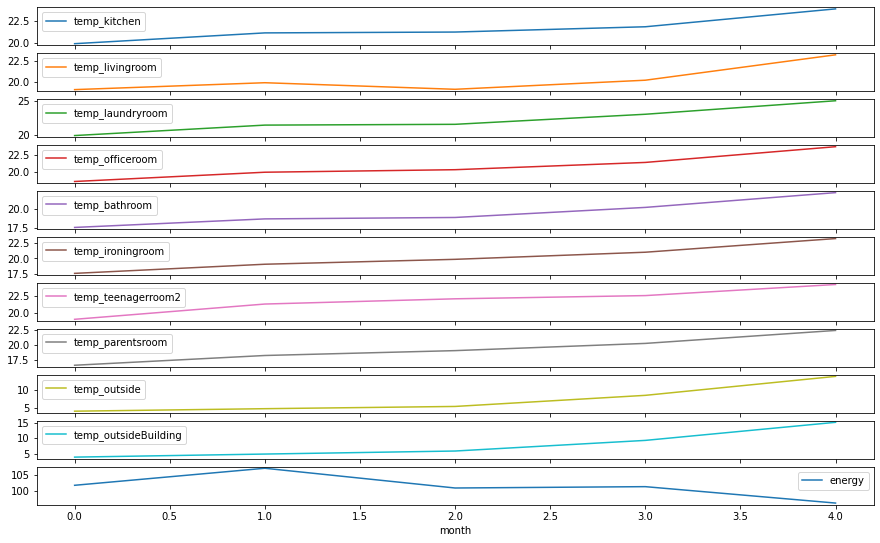

In [ ]:
#explore month-level (m1, m2, m3, m4... etc) trends in temperature and energy usage
#only 5 months data is available  (Jan-May)
cols = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
            'temp_officeroom', 'temp_bathroom',
            'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
            'temp_outside', 'temp_outsideBuilding', 'energy', 'month']

energyUsage[cols].groupby('month').mean().plot(kind='line', layout=(12,1), figsize=(15,10),subplots=True)
plt.xticks([1,2,3,4,5], labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.show()


##### Explore weekday vs. weekend

**Comments**

* Except for the `temp_kitchen` and `temp_teenagerroom2`, all the temperatures (both inside and outside) increase at the weekends
* Also, **more energy is consumed at the weekends**

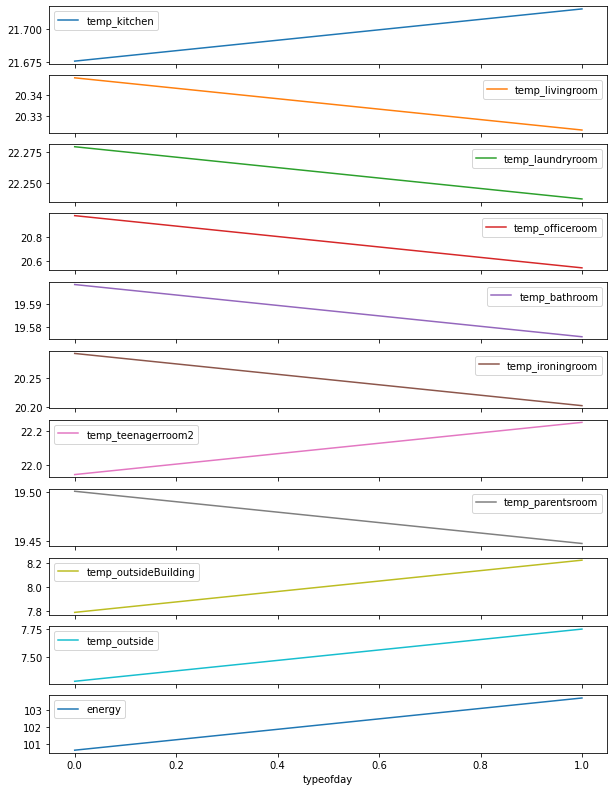

In [ ]:
#plot weekend avg vs weekday avg
cols = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
        'temp_officeroom', 'temp_bathroom', 'temp_ironingroom', 
        'temp_teenagerroom2', 'temp_parentsroom', 'temp_outsideBuilding',
        'temp_outside', 'energy', 'typeofday']

#smaller figsize so as to compare weekday-weekend closely
energyUsage[cols].groupby('typeofday').mean().plot(kind='line', subplots=True, layout=(12,1), figsize=(10,15)) 
plt.xticks([0, 1], labels = ['weekday', 'weekend'])
plt.show()


##### Explore hour-level

**Comments**

* The indoor temperatures stay constant for the whole day
* The outside temperatures increase at noon and afternoon, then decrease at night/midnight and dawn
* **Energy consumption is low during the day but peaks at night**. Likely, no residents are at home during the daytime, and consumption increases at night when they return 

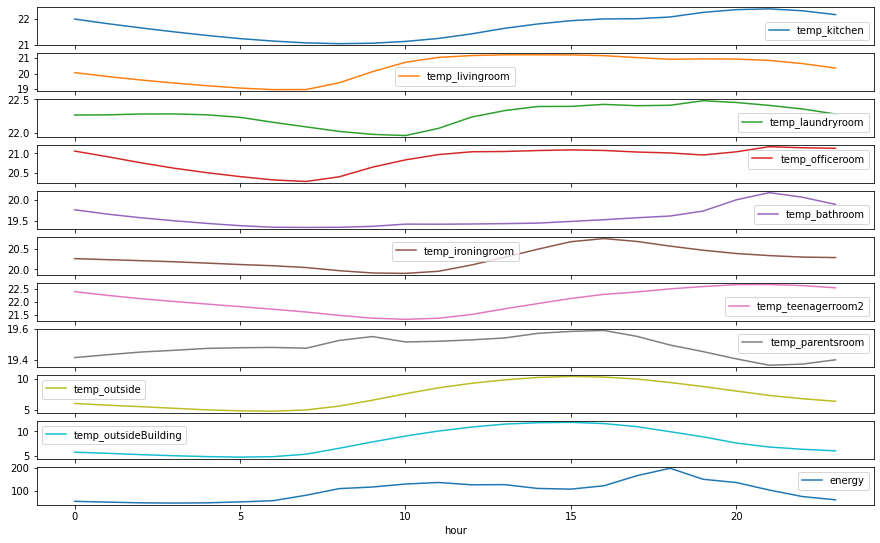

In [ ]:
#explore hour-level trends in temperature and energy usage
cols = ['temp_kitchen', 'temp_livingroom', 'temp_laundryroom',
            'temp_officeroom', 'temp_bathroom',
            'temp_ironingroom', 'temp_teenagerroom2', 'temp_parentsroom',
            'temp_outside', 'temp_outsideBuilding', 'energy', 'hour']

energyUsage[cols].groupby('hour').mean().plot(kind='line', layout=(12,1), figsize=(15,10),subplots=True)
plt.show()


#### Explore time relationships for humidity variables

##### Explore using full time series

**Comments**

* Intuitively, there is a null trend except for the `hr_outsideBuilding` (downward trend)
* No relationship is obtained between `energy` and humidity variables across the timeline due to noise

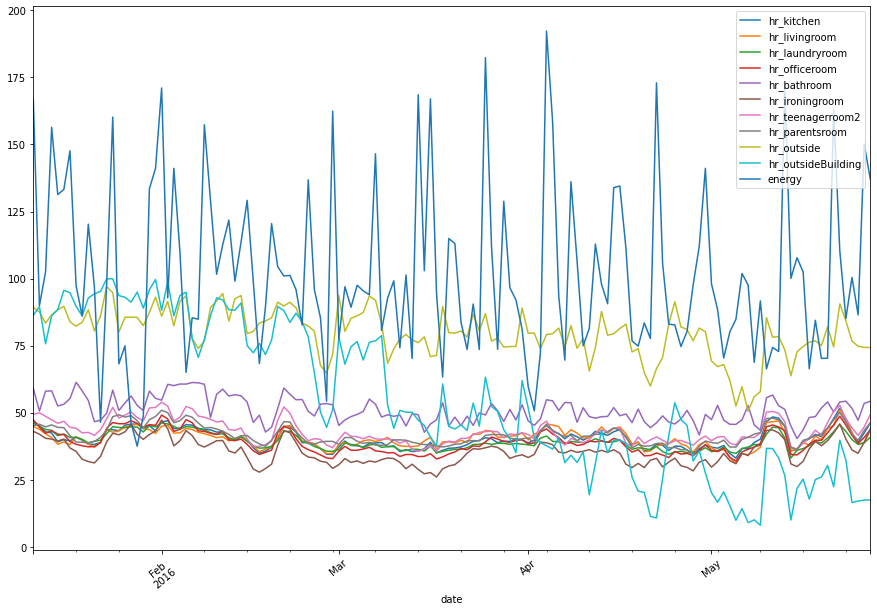

In [ ]:
#explore humidity variables across time and compare with target variable (energy) across the timeline

cols = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
            'hr_officeroom', 'hr_bathroom',
            'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
            'hr_outside', 'hr_outsideBuilding', 'energy', 'date']

energyUsage[cols].groupby('date').mean().plot(kind='line', layout=(12,1), figsize=(15,10))
plt.xticks(rotation = 40)
plt.show()

##### Explore 7-day rolling averages

**Comments**

* There is a downtrend for outside humidity variables. Obviously, the higher the outside temperature is, the lower the outside humidity is
* The indoor humidity variables seem to have a horizontal trend with irregular change
* No relationship is obtained between `energy` and humidity variables across the timeline

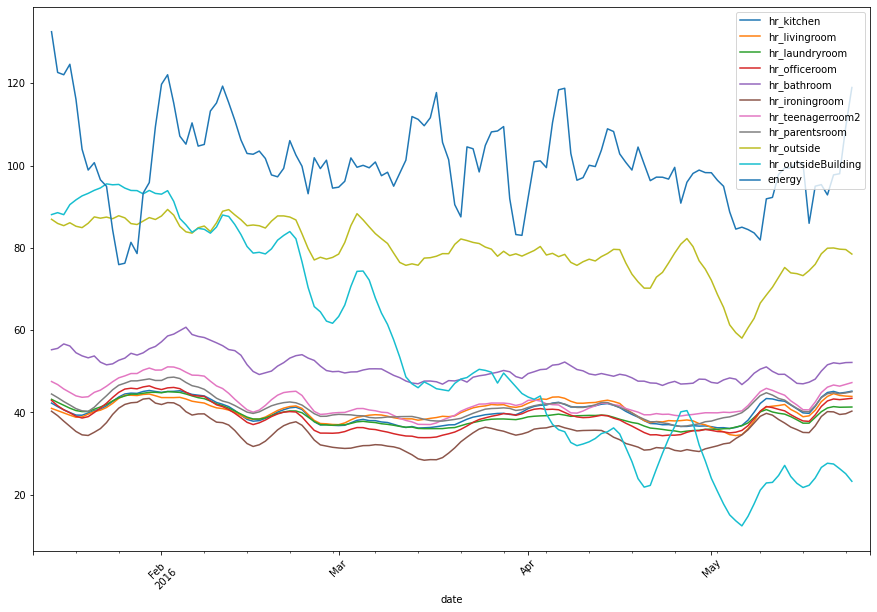

In [ ]:
#explore 7-day rolling averages to identify week-level trends in humidity and energy usage

#This is also a proxy for plotting the humidity and energy metrics by the 'week' column, 
#and it provides an understanding of intra-week changes too 

cols = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
            'hr_officeroom', 'hr_bathroom',
            'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
            'hr_outside', 'hr_outsideBuilding', 'energy', 'date']

energyUsage[cols].groupby('date').mean().rolling(7).mean().shift(-3).plot(kind='line', layout=(12,1), figsize=(15,10))
plt.xticks(rotation = 45)
plt.show()

##### Explore day of week

**Comments**

* Intuitively, the outside humidity variables follow a cyclical pattern
* Seems like there is a null trend in indoor humidity variables as well as no relationship between them and the energy consumption

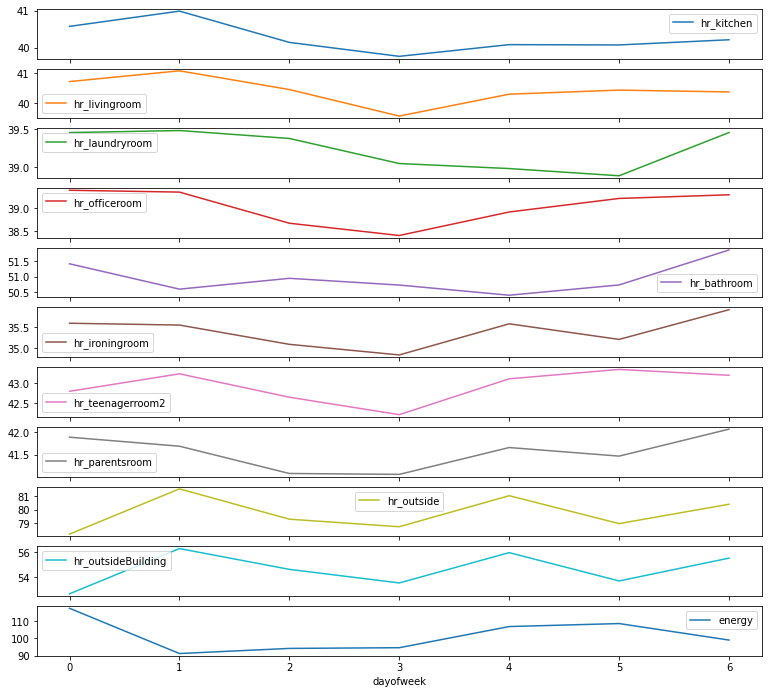

In [ ]:
#explore week-day (day of week, 0-7) trends in humidity and energy usage

cols = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
        'hr_officeroom', 'hr_bathroom',
        'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
        'hr_outside', 'hr_outsideBuilding', 'energy', 'dayofweek']

energyUsage[cols].groupby('dayofweek').mean().plot(kind='line', subplots=True, layout=(12,1), figsize=(13,13))
plt.xticks([0,1,2,3,4,5,6], labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


##### Explore day of month

**Comments**

* Data is irregular
* **There doesn't seem any monthly trend**

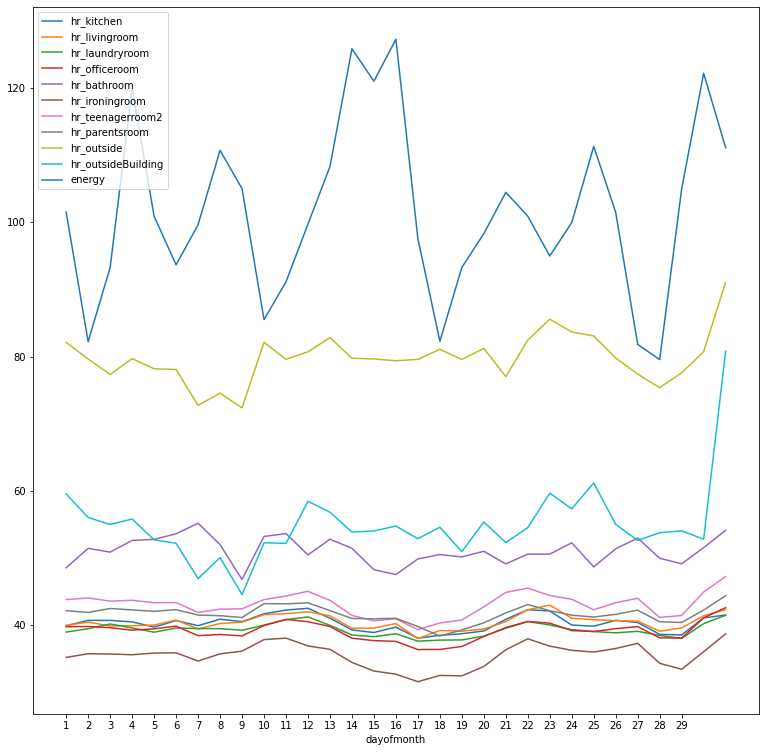

In [ ]:
#explore day of month (1- 30/31) trends in humidity and energy usage

cols = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
            'hr_officeroom', 'hr_bathroom',
            'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
            'hr_outside', 'hr_outsideBuilding', 'energy', 'dayofmonth']

energyUsage[cols].groupby('dayofmonth').mean().plot(kind='line', layout=(12,1), figsize=(13,13))
plt.xticks(np.arange(1, 30, 1))
plt.show()

##### Explore month-level

**Comments**

* There is a downward trend in the outside humidity variables
* Overall, the indoor humidity decreases from January to March, then increases till May
* No trend is observed between energy consumption and other humidity variables over 5 months

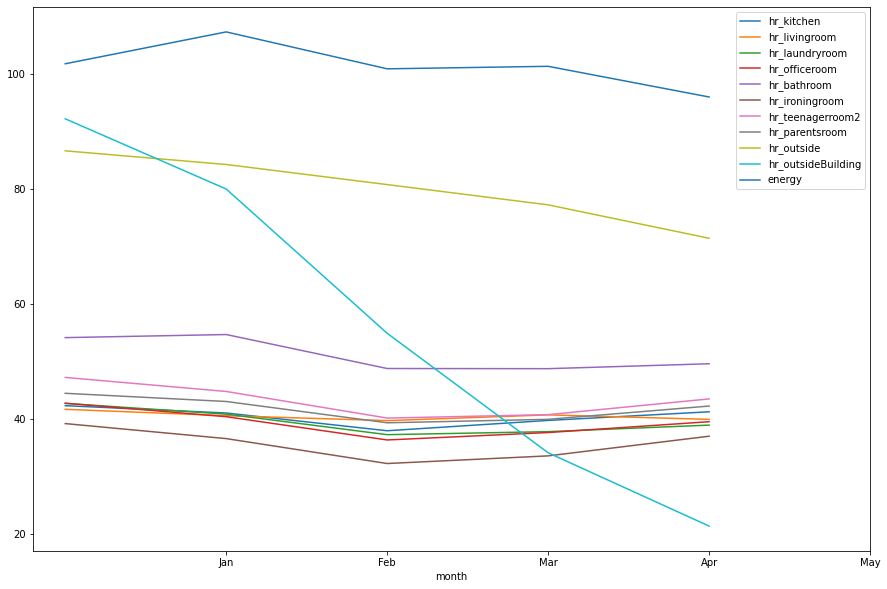

In [ ]:
#explore month-level (m1, m2, m3, m4... etc) trends in humidity and energy usage
#only 5 months data is available  (Jan-May)
cols = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
            'hr_officeroom', 'hr_bathroom',
            'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
            'hr_outside', 'hr_outsideBuilding', 'energy', 'month']

energyUsage[cols].groupby('month').mean().plot(kind='line', layout=(12,1), figsize=(15,10))
plt.xticks([1,2,3,4,5], labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.show()


##### Explore weekday vs. weekend

**Comments**

* There is a downward trend in the `hr_kitchen`, `hr_livingroom`, `hr_laundryroom` variables
* By contrast, upward trend is observed in the `hr_officeroom`, `hr_bathroom`, `hr_ironingroom`, `hr_teenagerroom2`, `hr_parentsroom`

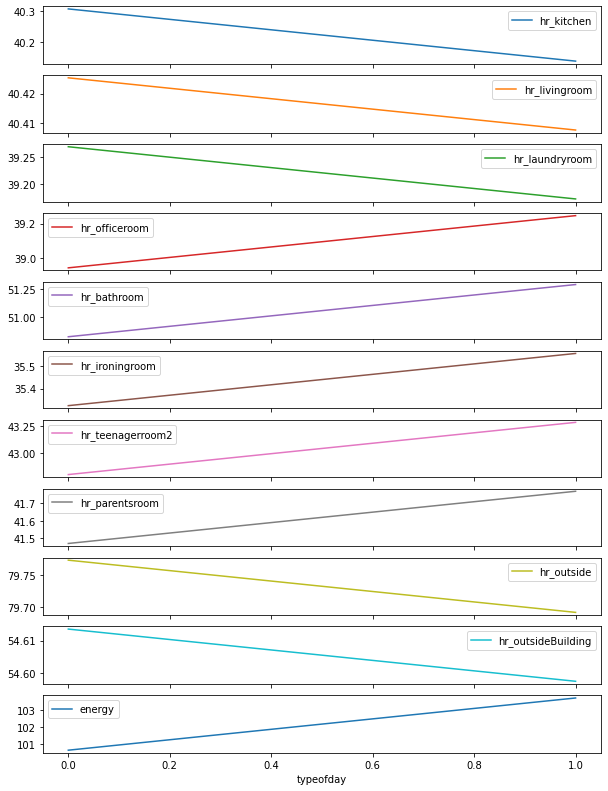

In [ ]:
#plot weekend avg vs weekday avg
cols = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
            'hr_officeroom', 'hr_bathroom',
            'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
            'hr_outside', 'hr_outsideBuilding', 'energy', 'typeofday']

#smaller figsize so as to compare weekday-weekend closely
energyUsage[cols].groupby('typeofday').mean().plot(kind='line', subplots=True, layout=(12,1), figsize=(10,15)) 
plt.xticks([0, 1], labels = ['weekday', 'weekend'])
plt.show()


##### Explore hour-level

**Comments**

Except for `hr_bathroom`, both the outside and inside humidity is low in the afternoon and high at night or in the morning

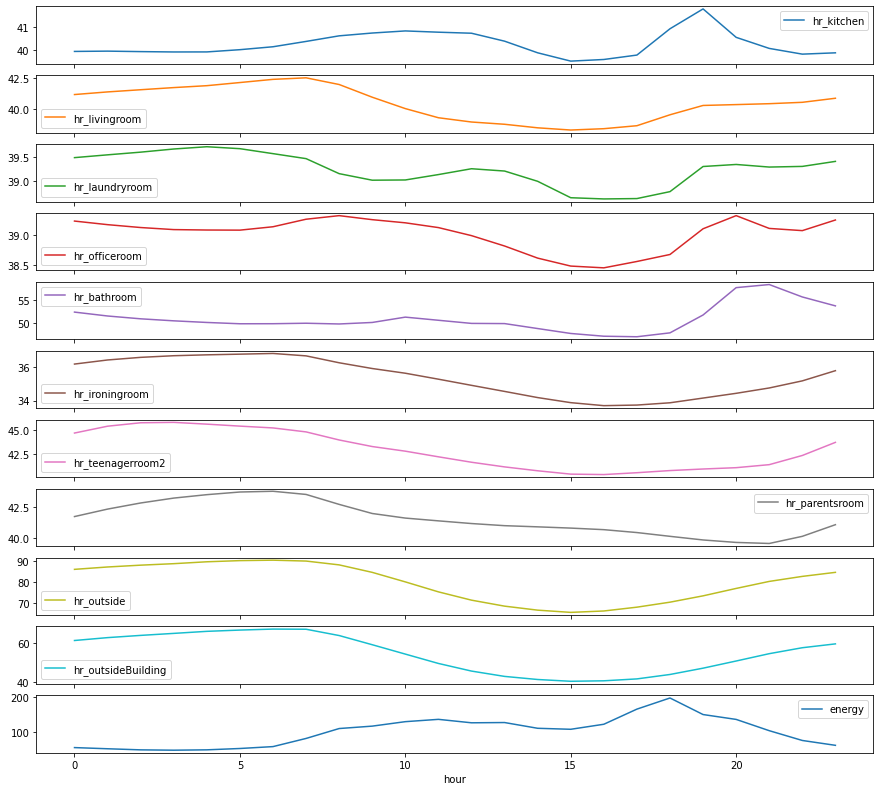

In [ ]:
#explore hour-level trends in humidity and energy usage
cols = ['hr_kitchen', 'hr_livingroom', 'hr_laundryroom',
            'hr_officeroom', 'hr_bathroom',
            'hr_ironingroom', 'hr_teenagerroom2', 'hr_parentsroom',
            'hr_outside', 'hr_outsideBuilding', 'energy', 'hour']

energyUsage[cols].groupby('hour').mean().plot(kind='line', layout=(12,1),subplots=True, figsize=(15,15))
plt.show()

#### Explore time relationships for weather variables

##### Explore using full time series

**Comments**

* There is an uptrend for the `temp_dewpoint`
* Data is irregular
* No relationship is obtained between `energy` and other variables across the timeline due to noise

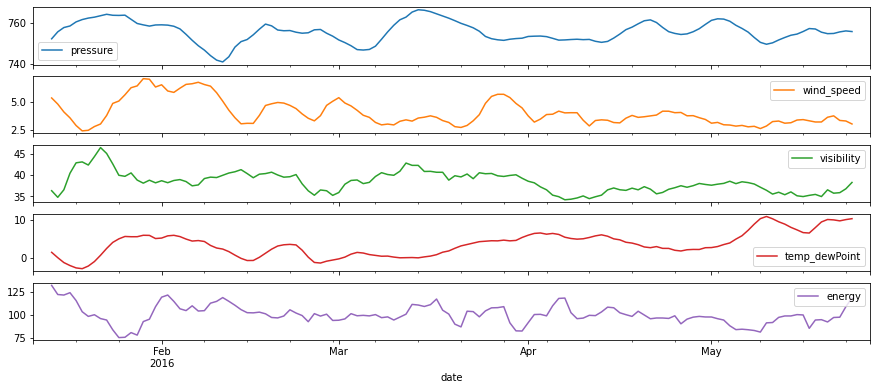

In [ ]:
cols = ['pressure', 'wind_speed', 'visibility', 'temp_dewPoint', 'energy', 'date']

energyUsage[cols].groupby('date').mean().rolling(7).mean().shift(-3).plot(kind='line', layout=(12,1), figsize=(15,15), subplots=True)
plt.xticks(rotation = 45)
plt.show()

##### Explore 7-day rolling averages

**Comments**

* Seems like there is a positive correlation between the `energy` and `wind_speed`
* Again, data is irregular

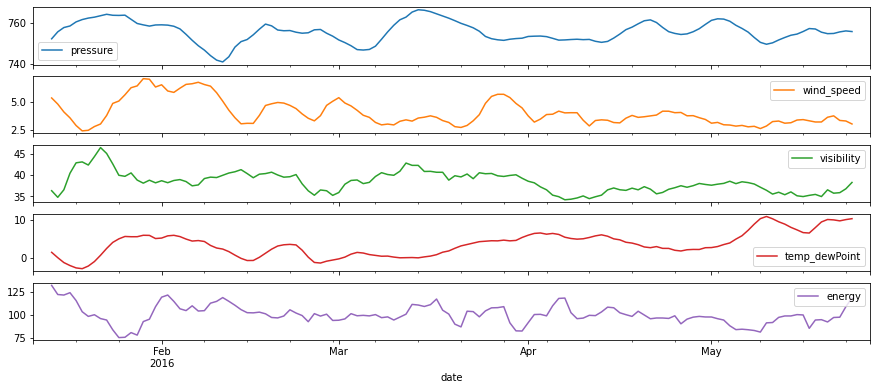

In [ ]:
cols = ['pressure', 'wind_speed', 'visibility', 'temp_dewPoint', 'energy', 'date']

energyUsage[cols].groupby('date').mean().rolling(7).mean().shift(-3).plot(kind='line', layout=(12,1), figsize=(15,15), subplots=True)
plt.xticks(rotation = 45)
plt.show()

##### Explore month-level

**Comments**

* There is a downward trend in the `wind_speed`, `visibility` and `energy` over 5 months
* There is an uptrend for the `temp_dewPoint`
* `pressure` and `wind_speed`'s trend is against each other

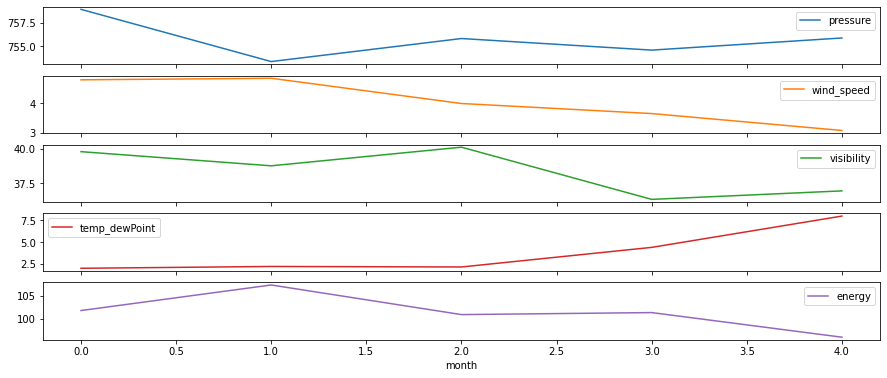

In [ ]:
cols = ['pressure', 'wind_speed', 'visibility', 'temp_dewPoint', 'energy', 'month']

energyUsage[cols].groupby('month').mean().plot(kind='line', layout=(12,1), figsize=(15,15), subplots=True)
plt.xticks([1,2,3,4,5], labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.show()

##### Explore hour-level

**Comments**

* The `pressure`, `wind_speed` and `temp_dewPoint` peaks in the afternoon then slightly decreases
* No trend is observed for the `visibility`

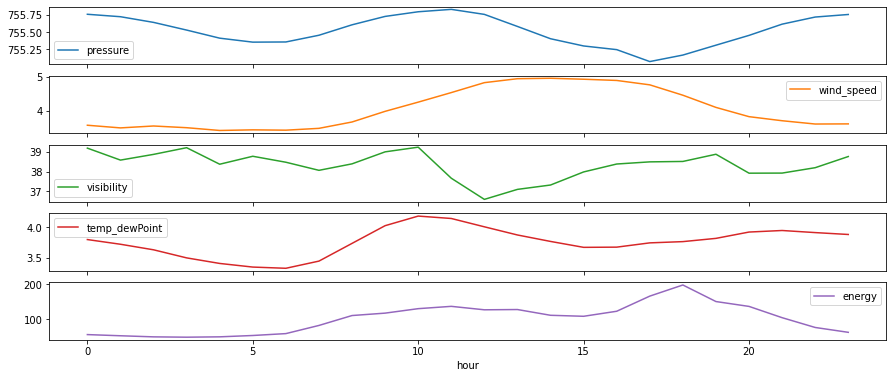

In [ ]:
cols = ['pressure', 'wind_speed', 'visibility', 'temp_dewPoint', 'energy', 'hour']

energyUsage[cols].groupby('hour').mean().plot(kind='line', layout=(12,1),subplots=True, figsize=(15,15))
plt.show()

#### Explore time components of energy column 

1.   Trend, seasonality and residuals
2.   Autocorrelation (ACF, PAF)
3.   Stationarity





1. Explore trend, seasonality and residuals of energy column

* The data shows very little trend overall, and doesn't establish any clear upward or downward trend
* Although there is a bit of trend at major dips in 'observed' energy usages around ~20 Jan 2016 and 01-06 Apr 2016 (see visuals below)
* There is **an obvious weekday-weekend seasonality** as we can see the usage go up on weekends (equivalent to a 2-day period) and down on week days (equivalent to a 5-day period). see visuals below
* There is a lot of residuals which is not being captured in trend of seasonality (as seen while comparing the y axis of the trend, seasonality and residuals)

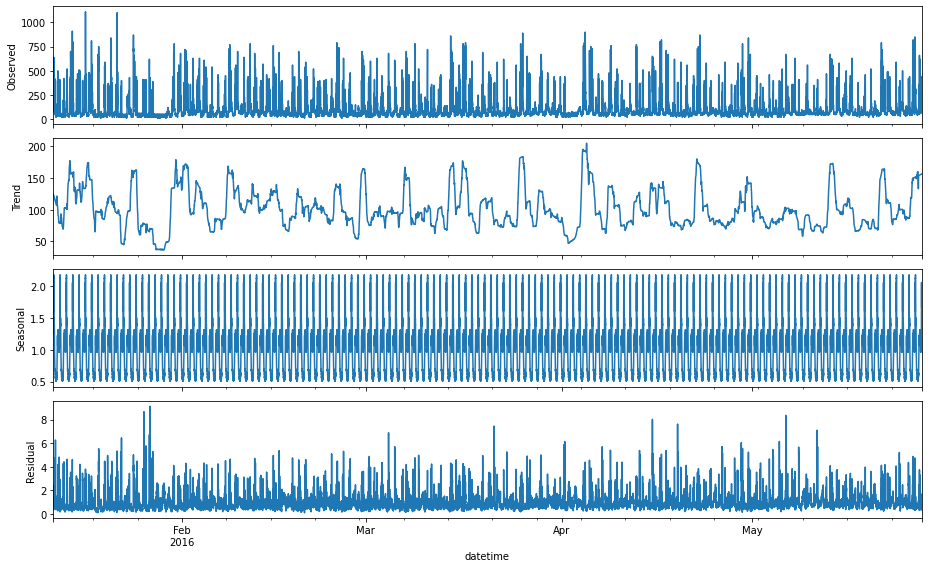

In [ ]:
#explore time components of energy. promote datetime to index
energyUsage = energyUsage.set_index('datetime', drop=False)
energy = energyUsage['energy']
plt.rcParams["figure.figsize"] = (13,8)

#provide frequency based on time period. secoond is provided as 60 * 60 * 24. we have data at freq of 10 min
components = seasonal_decompose(x=energy, freq=int((60*24)/10), model='multiplicative', extrapolate_trend='freq') #'additive' gives similar output
components.plot()

#create time component variables (trend, seasonality, residuals)
energyUsage['energy_trend'] = components.trend
energyUsage['energy_seasonality'] = components.seasonal
energyUsage['energy_residual'] = components.resid

2. Explore autocorrelation (ACF, PACF) of energy column

* ACF
  * Values are highly correlated with t-1 values (1 lag) and t-2 values (2 lag) beyond which autocorrelation decreases as correlation is less than 0.5
  * We are likely deadling with an Auto Regressive process

* PACF: incremental correlation is restricted to t-1 (1 lag) values 
 * Other lag values are very small (less than 0.2) 
 * Additionally, t-2 value is negatively correlated and after that positive correlated

* So t-1 values are highly predictive of current values, and should be used in the model
* We should start with an **Auto Regressive model with lags 1, 2**

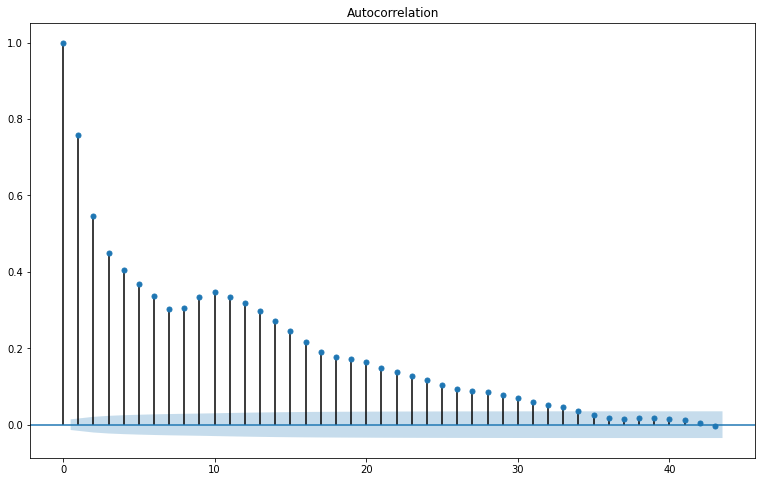

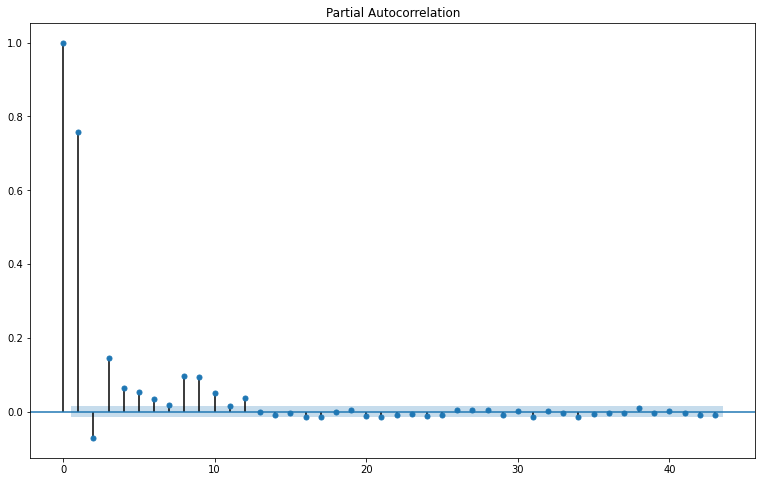

In [ ]:
#Explore autocorrelation (use ACF, PACF plots)
enery_acf = plot_acf(energy)
enery_pacf = plot_pacf(energy)

#Create lag variables
energyUsage['energy_lag1'] = energyUsage['energy'].shift(1)

#Create additional lag variables to check if ML model will give a better result by these inclusions
energyUsage['energy_lag2'] = energyUsage['energy'].shift(2)
energyUsage['energy_lag3'] = energyUsage['energy'].shift(3)

3. Explore stationarity in the energy column
* The ADF statistic is more negative compared to the critical values, indicating that the data is more stationary
* There is stationarity (p-value is 0.0) which was also reflected in the visual analysis above (no visible trend)
* **No transformation is needed**

In [ ]:
#Explore stationarity (data remains stationary (no trend) in time in terms of mean, medium, sd, etc.)
#Stationarity is preferred
#Use dickey fuller test (which provides a p-value. value < 0.05 denotes stationarity)
#As we have not found a clean trend in our data, it is unlikely thaat there is a trend. We will verify using the p statistic

adf, p, lag_count, obs_count, crit_values, info_critereon =  adfuller(energy.values)

#check the 2nd value, which is 0.0, hence no stationarity
print("p-value: ", p)
print("adf: ", adf)
print("lag_count: ", lag_count)
print("obs_count: ", obs_count)
print("crit_values: ", crit_values)
print("info_critereon: ", info_critereon)

p-value:  0.0
adf:  -21.42113951693499
lag_count:  11
obs_count:  19723
crit_values:  {'1%': -3.430681600227742, '5%': -2.8616865555329394, '10%': -2.566848007525354}
info_critereon:  220852.6410982806


### **Feature Scaling**

* As found when visualising distributions, most features either have significant outliers or are heavily skewed, therefore, requiring scaling methods
* `energy` the target variable will be kept as scaling it will have affect on our performance results


#### Analyze different methods 

**Comments**

Comparing different scaling method indicate:
* For all variables the quantile transformation produces the most improved distribution characteristics
* For the sake of parsimony, this subset of features will all be scaled using the **quantile transformation** before being transformed with **MinMaxScaler**

In [ ]:
energyUsage['energy_lag1'].fillna((energyUsage['energy_lag1'].median()), inplace=True)

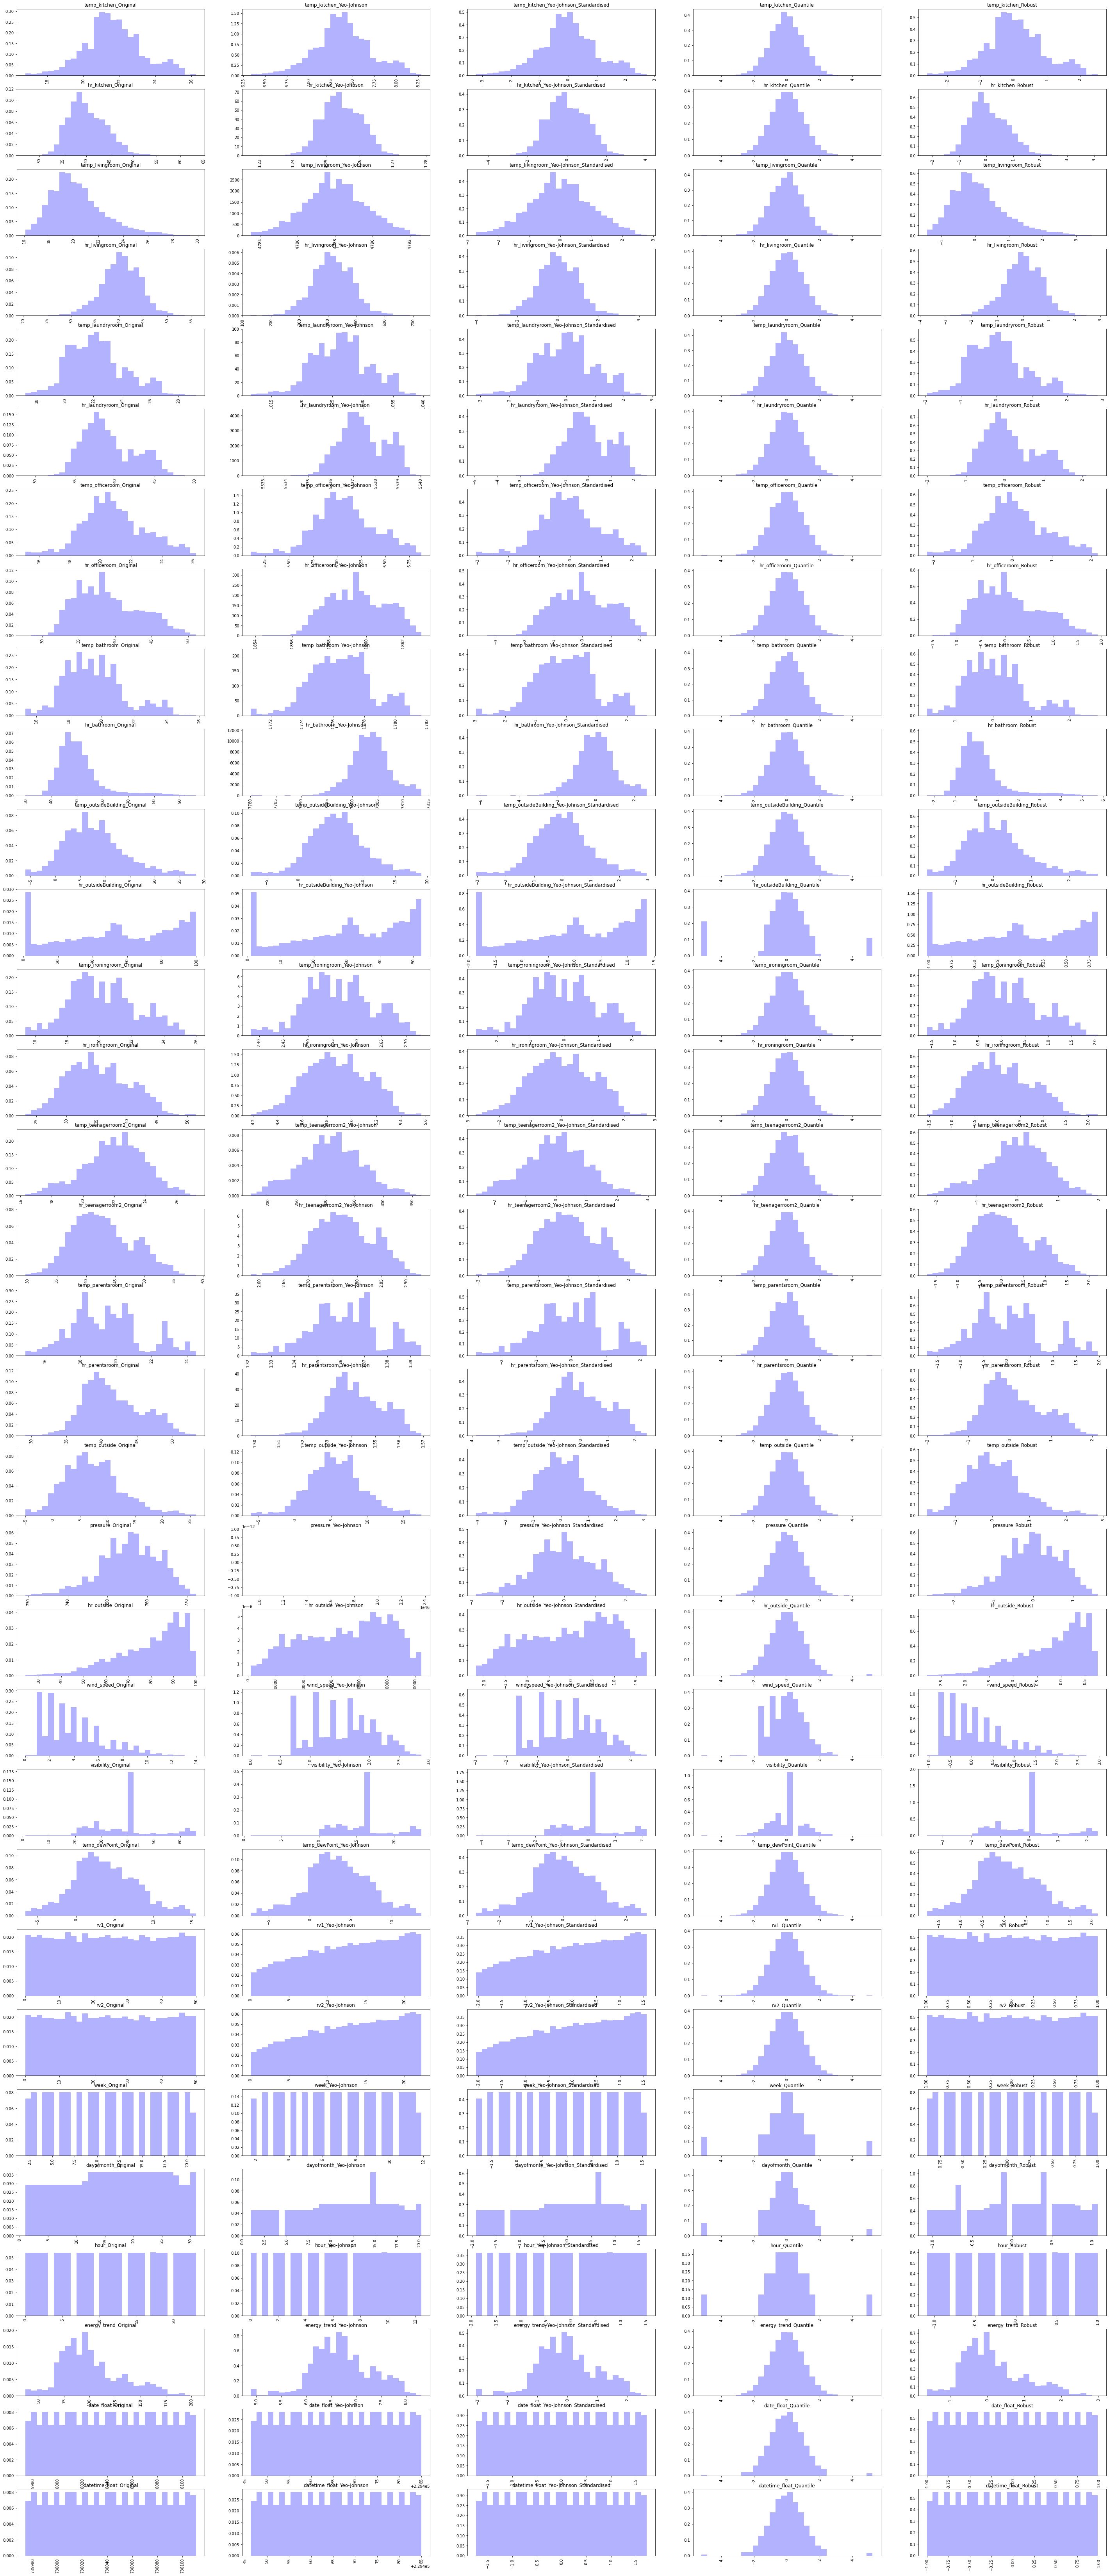

In [ ]:
df = energyUsage[['temp_kitchen', 'hr_kitchen', 'temp_livingroom',
       'hr_livingroom', 'temp_laundryroom', 'hr_laundryroom',
       'temp_officeroom', 'hr_officeroom', 'temp_bathroom', 'hr_bathroom',
       'temp_outsideBuilding', 'hr_outsideBuilding', 'temp_ironingroom',
       'hr_ironingroom', 'temp_teenagerroom2', 'hr_teenagerroom2',
       'temp_parentsroom', 'hr_parentsroom', 'temp_outside', 'pressure',
       'hr_outside', 'wind_speed', 'visibility', 'temp_dewPoint', 'rv1', 'rv2',
       'week', 'dayofmonth', 'hour', 'energy_trend', 'date_float', 'datetime_float']]
nbins = 30

transformations = {
    "Original": None,
    "Yeo-Johnson": PowerTransformer(method='yeo-johnson',standardize=False),
    "Yeo-Johnson_Standardised": PowerTransformer(method='yeo-johnson',standardize=True),
    "Quantile": QuantileTransformer(output_distribution='normal',random_state=0,n_quantiles=599),
    "Robust": RobustScaler()
}

subplot_titles_list = []

for column in df.columns.to_list():
    for transformation in transformations.keys():
        subplot_titles_list.append("{0}_{1}".format(column,transformation))


columns=len(transformations)
rows=len(df.columns.to_list())
plt.figure(figsize=(50,120))

j = 0
for i, column in enumerate(df.columns):
    for transformation,transformer in transformations.items():

        plt.subplot(rows,columns,j+1)
        j += 1
        
        if transformation == 'Original':
            transformed = df[column]
        else:
            fit_transformer = transformer.fit(df[[column]])
            transformed = fit_transformer.transform(df[[column]])

        plt.hist(transformed, alpha=0.3, color='b', density=True,bins=nbins)
        plt.title("{0}_{1}".format(column,transformation))
        plt.xticks(rotation='vertical')

#### Create Scaled Features

In [ ]:
# Code adapted from Week04 Lab Exercises

#scale both x and y variables
attributes = ['temp_kitchen', 'hr_kitchen', 'temp_livingroom',
       'hr_livingroom', 'temp_laundryroom', 'hr_laundryroom',
       'temp_officeroom', 'hr_officeroom', 'temp_bathroom', 'hr_bathroom',
       'temp_outsideBuilding', 'hr_outsideBuilding', 'temp_ironingroom',
       'hr_ironingroom', 'temp_teenagerroom2', 'hr_teenagerroom2',
       'temp_parentsroom', 'hr_parentsroom', 'temp_outside', 'pressure',
       'hr_outside', 'wind_speed', 'visibility', 'temp_dewPoint', 'rv1', 'rv2',
       'week', 'dayofmonth', 'hour', 'energy_trend', 'date_float', 'datetime_float']

energyUsage_X1 = energyUsage[attributes]

energyUsage_X_scaled = energyUsage_X1.copy()

quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           random_state=0,n_quantiles=599).fit(energyUsage_X_scaled.loc[:, attributes])
energyUsage_X_scaled.loc[:, attributes] = quantile_transformer.transform(energyUsage_X_scaled.loc[:, attributes])

minmax_scaler = MinMaxScaler().fit(energyUsage_X_scaled.loc[:,attributes])
energyUsage_X_scaled.loc[:,attributes] = minmax_scaler.transform(energyUsage_X_scaled.loc[:,attributes])

#### Check distribution of scaled features

**Comments**

- All features are within the same range (0 to 1)
- Distributions are the same shape as in the case of the features scaled with quantile, same shape as the quantile scaled shape
- Still significant outliers from `hr_outsideBuilding` (0 and 1 values) which could potentially cause issues during modelling
- Some values of 0 and 1 from time components could cause issue as well

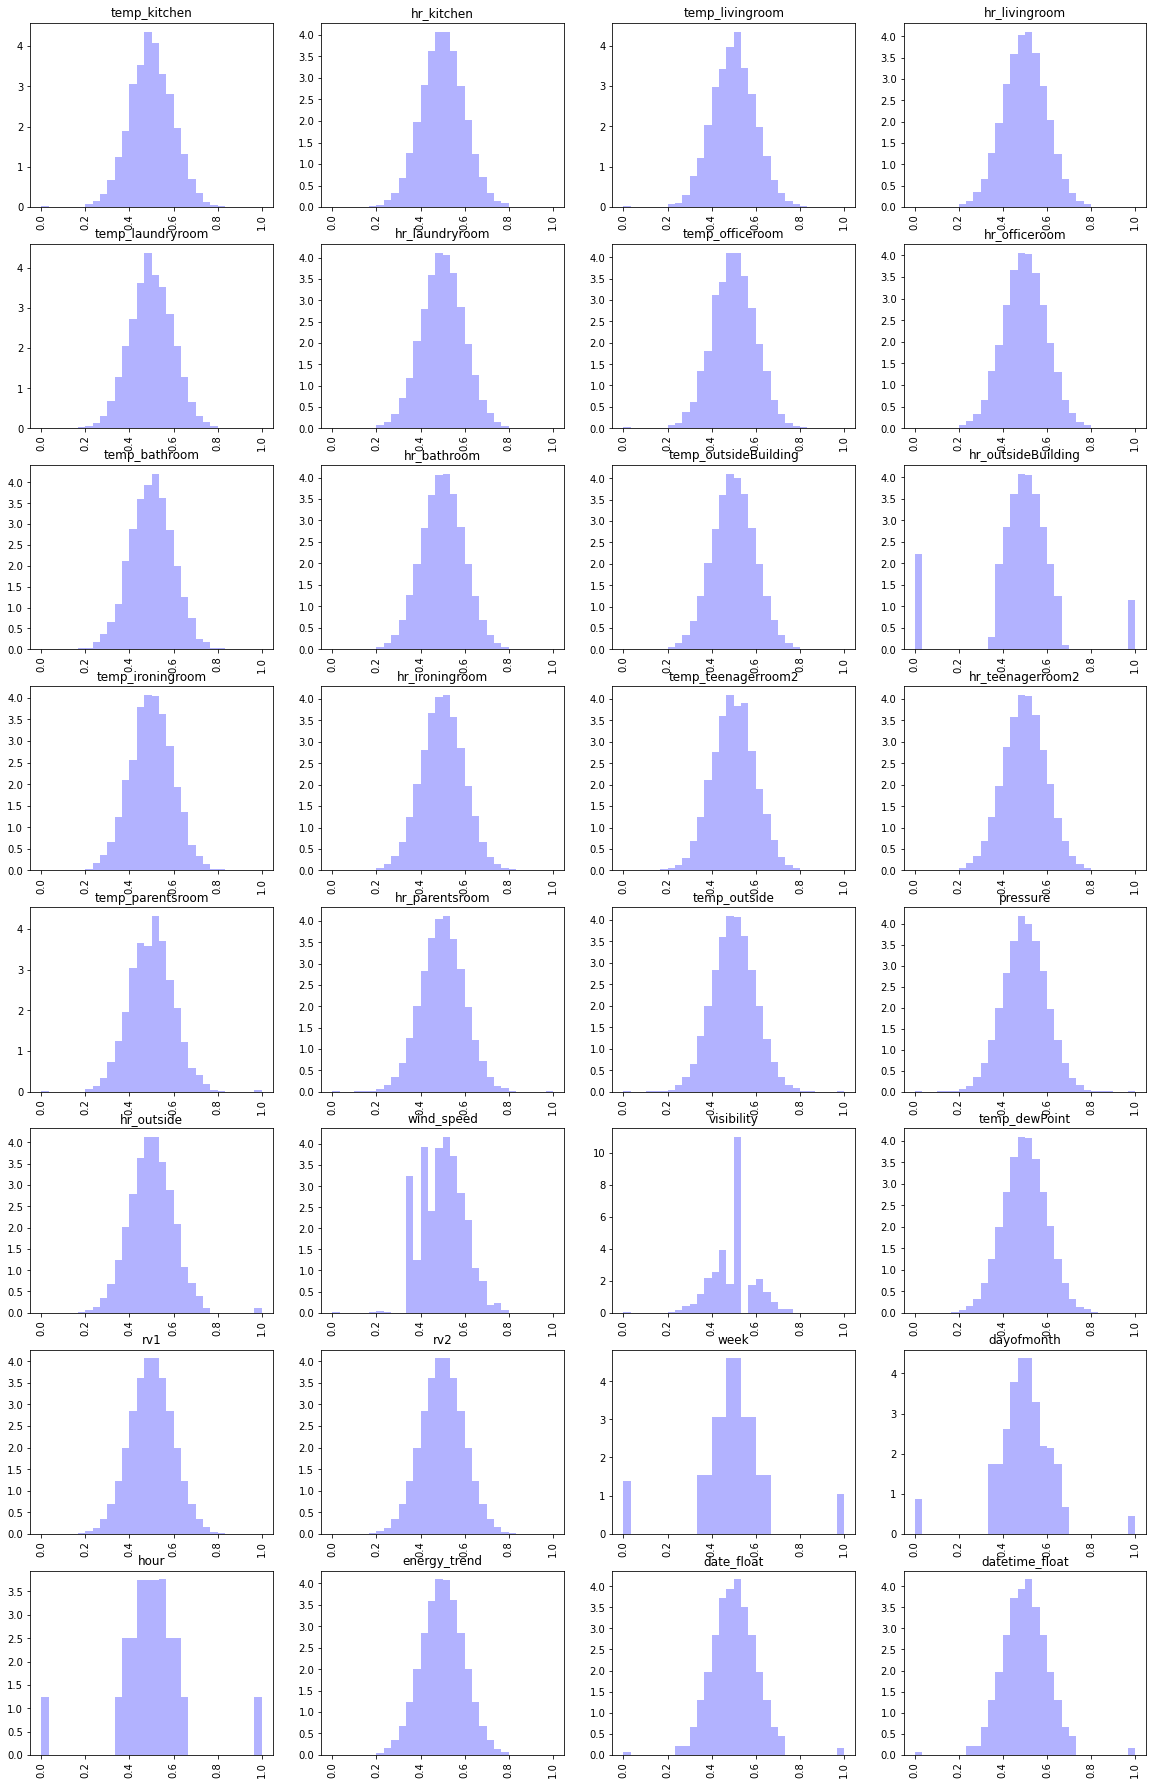

In [ ]:
plt.figure(figsize=(20,40))
for i, col in enumerate(energyUsage_X_scaled.columns):
    plt.subplot(10,4,i+1)
    plt.hist(energyUsage_X_scaled[col], alpha=0.3, color='b', density=True,bins=30)
    plt.title(col)
    plt.xticks(rotation='vertical')

#### Recheck variable relationships

**Comments**

* The relationships between variables are maintained
* Marginal improvement and ease of identification of potential decision boundaries

In [ ]:
plt.figure(figsize=(40,900))

i=0

for pos, axis1 in enumerate(attributes):   # Pick a first col
    for pos2, axis2 in enumerate(attributes[pos+1:]):   # Pick a later col
        
        i = i + 1
        r = random.uniform(0.3, 0.7)
        b = random.uniform(0.3, 0.7)
        g = random.uniform(0.3, 0.7)
        color = (r, g, b)
        plt.subplot(150,4,i)

        plt.scatter(energyUsage_X_scaled.loc[:, axis1], energyUsage_X_scaled.loc[:, axis2], color = color)
        plt.xlabel(axis1)
        plt.ylabel(axis2)

Output hidden; open in https://colab.research.google.com to view.

#### Recheck feature correlations

**Comments**

* In general, the correlation between features and target seems to have increased after scaling. This suggests a higher predictive capability
* Also, the correlation of temperature and humidity features has increased

[Text(0.5, 0, 'temp_kitchen'),
 Text(1.5, 0, 'hr_kitchen'),
 Text(2.5, 0, 'temp_livingroom'),
 Text(3.5, 0, 'hr_livingroom'),
 Text(4.5, 0, 'temp_laundryroom'),
 Text(5.5, 0, 'hr_laundryroom'),
 Text(6.5, 0, 'temp_officeroom'),
 Text(7.5, 0, 'hr_officeroom'),
 Text(8.5, 0, 'temp_bathroom'),
 Text(9.5, 0, 'hr_bathroom'),
 Text(10.5, 0, 'temp_outsideBuilding'),
 Text(11.5, 0, 'hr_outsideBuilding'),
 Text(12.5, 0, 'temp_ironingroom'),
 Text(13.5, 0, 'hr_ironingroom'),
 Text(14.5, 0, 'temp_teenagerroom2'),
 Text(15.5, 0, 'hr_teenagerroom2'),
 Text(16.5, 0, 'temp_parentsroom'),
 Text(17.5, 0, 'hr_parentsroom'),
 Text(18.5, 0, 'temp_outside'),
 Text(19.5, 0, 'pressure'),
 Text(20.5, 0, 'hr_outside'),
 Text(21.5, 0, 'wind_speed'),
 Text(22.5, 0, 'visibility'),
 Text(23.5, 0, 'temp_dewPoint'),
 Text(24.5, 0, 'rv1'),
 Text(25.5, 0, 'rv2'),
 Text(26.5, 0, 'week'),
 Text(27.5, 0, 'dayofmonth'),
 Text(28.5, 0, 'hour'),
 Text(29.5, 0, 'energy_trend'),
 Text(30.5, 0, 'date_float'),
 Text(31.5, 0, 'd

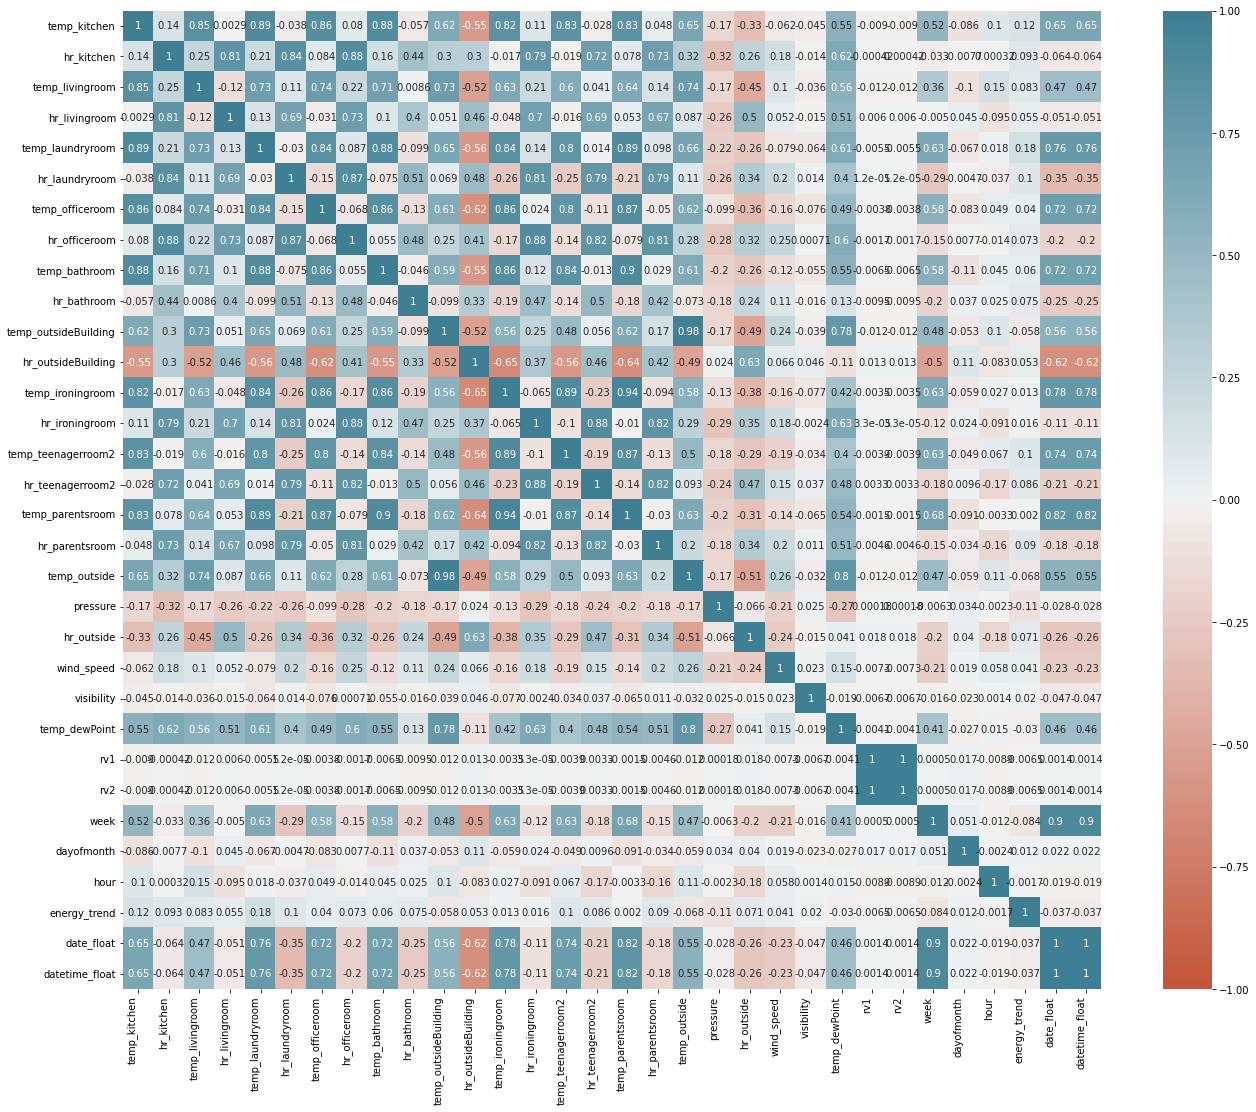

In [ ]:
fig, ax = plt.subplots(figsize=(22, 18))
corr = energyUsage_X_scaled.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

# **Choice of ML model**

* Common approaches are classical models that work on temporal variation (above time series details) can be used, but we will require to use the additional x variables to predict the energy usage
* We can use supervised ML models which include the below 3 things
  * x variables
  * time components as x variables (month, dayofmonth, hour, dayofweek (weekday/weekend), dayofweek), 7-day average. these have already been extracted during data cleaning and explored during data exploration
  * lagged values (t-1, t-2 values) etc. we have found out that t-1 is a good predictor
* We can also use deep learning models which can learn the relationships in data and predict energy usage (using its black box, hidden networks architecture)

* We will predict using a supervised ML model (Linear Regression or Decision Tree Regression) and then predict using a deep lerning model (ANN or CNN)

* Finally we will choose one of the models and do a final prediction

# **Modeling pre-processing**


1. Create **train-validation data splits** (use full data in case of **cross-validation**)
  * We will try out both options, but cross-validation may provide better results due to smaller data size
2. Set up performance evaluation module
  * We will focus on all popular time series peformance metrics
  * **MAPE** and **MAE** are highly popular performance metrics
  * As both independent and target variables are normalized, **MSE** will be a good metric to observe
  * **RMSE** is also a good error indicator which is not sensitive to scale of error (due to the 'root' computation)
  * **R-squared** is a good metric which shows whether or not the model is a good fit for the observed values
3. Feature selection
  * We will run base model based on **all variables**
  * We will choose features based on **exploratory analysis** (above) and re-run model
  * We will then **tune hyperparameters** to obtain a final model



## **Prepare training data**

#### Divide the data into 70/30


In [ ]:
#create x, y datasets for train, test
train_data, test_data = train_test_split(energyUsage, test_size = 0.3, shuffle=True, random_state=42)

train_y = train_data['energy']
train_x = train_data.drop(['energy', 'energy_lag2', 'energy_lag3'], axis=1)

test_y = test_data['energy']
test_x = test_data.drop(['energy', 'energy_lag2', 'energy_lag3'], axis=1)

#### Cross-validation

In [ ]:
#use full dataset for cross-validation
data_y = energyUsage['energy']
data_x = energyUsage.drop(['energy', 'energy_lag2', 'energy_lag3'], axis=1)

#### Perform feature scaling

In [ ]:
# Code adapted from Week04 Lab Exercises

#scale both x and y variables
attributes = ['temp_kitchen', 'hr_kitchen', 'temp_livingroom',
              'hr_livingroom', 'temp_laundryroom', 'hr_laundryroom',
              'temp_officeroom', 'hr_officeroom', 'temp_bathroom', 'hr_bathroom',
              'temp_outsideBuilding', 'hr_outsideBuilding', 'temp_ironingroom',
              'hr_ironingroom', 'temp_teenagerroom2', 'hr_teenagerroom2',
              'temp_parentsroom', 'hr_parentsroom', 'temp_outside', 'pressure',
              'hr_outside', 'wind_speed', 'visibility', 'temp_dewPoint', 'rv1', 'rv2',
              'week', 'dayofmonth', 'hour', 'energy_trend', 'date_float', 'datetime_float']

train_x_scaled = train_x.copy()

quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           random_state=0,n_quantiles=599).fit(train_x_scaled.loc[:, attributes])
train_x_scaled.loc[:, attributes] = quantile_transformer.transform(train_x_scaled.loc[:, attributes])
test_x_scaled = test_x.copy()
test_x_scaled.loc[:, attributes] = quantile_transformer.transform(test_x_scaled.loc[:, attributes])

minmax_scaler = MinMaxScaler().fit(train_x_scaled.loc[:,attributes])
train_x_scaled.loc[:, attributes] = minmax_scaler.transform(train_x_scaled.loc[:,attributes])
test_x_scaled.loc[:, attributes] = minmax_scaler.transform(test_x_scaled.loc[:, attributes])

In [ ]:
attributes = ['temp_kitchen', 'hr_kitchen', 'temp_livingroom',
              'hr_livingroom', 'temp_laundryroom', 'hr_laundryroom',
              'temp_officeroom', 'hr_officeroom', 'temp_bathroom', 'hr_bathroom',
              'temp_outsideBuilding', 'hr_outsideBuilding', 'temp_ironingroom',
              'hr_ironingroom', 'temp_teenagerroom2', 'hr_teenagerroom2',
              'temp_parentsroom', 'hr_parentsroom', 'temp_outside', 'pressure',
              'hr_outside', 'wind_speed', 'visibility', 'temp_dewPoint', 'rv1', 'rv2',
              'week', 'dayofmonth', 'hour', 'energy_trend', 'date_float', 'datetime_float']

data_x_scaled = data_x.copy()

quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           random_state=0,n_quantiles=599).fit(data_x_scaled.loc[:, attributes])
data_x_scaled.loc[:, attributes] = quantile_transformer.transform(data_x_scaled.loc[:, attributes])

minmax_scaler = MinMaxScaler().fit(data_x_scaled.loc[:,attributes])
data_x_scaled.loc[:, attributes] = minmax_scaler.transform(data_x_scaled.loc[:,attributes])

## **Define helper functions**

In [ ]:
def return_decision_tree_shape(g_search):
  print("# Decision Tree Shape")
  print("Tree depth: {0}".format(g_search.tree_.max_depth))
  print("Tree nodes: {0}".format(g_search.tree_.node_count))

def return_decision_tree_shape_gsearch(g_search):
  print("# Decision Tree Shape")

  print("Tree depth: {0}".format(g_search.best_estimator_.tree_.max_depth))
  print("Tree nodes: {0}".format(g_search.best_estimator_.tree_.node_count))
  
def get_tree_2_plot(clf):
  dot_data = tree.export_graphviz(clf, out_file=None, 
    feature_names=data_x_scaled.drop(['date', 'datetime'],axis=1).columns, 
    class_names='energy', 
    filled=True, rounded=True, 
    special_characters=True)
  pydot_graph = pydotplus.graph_from_dot_data(dot_data)
  pydot_graph.write_png('original_tree.png')
  graph = graphviz.Source(dot_data)
  return graph

def return_gsearch_model_summary(g_search):
  performance_rank = 'rank_test_score'
  cv_results = pd.DataFrame(g_search.cv_results_)
  cv_results.sort_values(by=performance_rank,inplace=True)

  print("# Best Model Performance Metrics")
  param = None
  best_scores = cv_results.query("{0} == 1".format(performance_rank))
  for metric in g_search.cv_results_.keys():
    if metric =='params':
      param = best_scores[metric]
    elif 'split' not in metric and metric != 'param_criterion' and metric != 'param_max_features':
      print("train_{0}: {1}".format(metric,best_scores[metric].mean()))
      print("validation_{0}: {1}".format(metric,best_scores[metric].mean()))
  print(param)

def generate_model_single_hyperparameter_tuning_plot(g_search):
  print("# Best Model Hyper Parameters")
  print(g_search.best_params_)

  cv_results = pd.DataFrame(g_search.cv_results_)
  param_name = list(g_search.best_params_.keys())[0]
  performance_metric = str(g_search.refit)

  for param,value in g_search.best_params_.items():
      if type(value) == str or type(value) == dict or value == None:
          cv_results["param_{0}".format(param)] = cv_results["param_{0}".format(param)].astype('str')

  plot_df = cv_results.sort_values(by="param_{0}".format(param))

  plt.plot(
      plot_df["param_{0}".format(param)], 
      plot_df['mean_train_score'],
      'r-'
  )
  plt.plot(
      plot_df["param_{0}".format(param)], 
      plot_df['mean_test_score'],
      'b--'
  )
  #plt.xscale("log")
  plt.ylabel(performance_metric)
  plt.xlabel(param_name)
  plt.legend(['Training','Validation'])
  plt.title("Best Value: {0}".format(g_search.best_params_[param_name]))
  plt.show()

def return_gsearch_model_summary_all_params(g_search):
    performance_rank = "rank_test_score"
    cv_results = pd.DataFrame(g_search.cv_results_)
    cv_results.sort_values(by=performance_rank,inplace=True)

    best_scores = cv_results.query("{0} == 1".format(performance_rank))
    summary_dict = {}
    for metric in g_search.cv_results_.keys():
        if 'split' not in metric and metric != 'param_criterion' and metric != 'param_max_features' and metric != 'params':
            summary_dict["train_{0}".format(metric)] = [best_scores[metric].mean()]
            summary_dict["validation_{0}".format(metric)] = [best_scores[metric].mean()]
    return pd.DataFrame.from_dict(summary_dict,orient='columns')

def render_multi_hyperparameter_tuning_dynamics_plot(g_search,top_n=None):
    print("# Best model parameters")
    print(g_search.best_params_)

    cv_results = pd.DataFrame(g_search.cv_results_)
    performance_metric = str(g_search.refit)
    print(performance_metric)

    plot_df = cv_results.sort_values(by='rank_test_score')
    if top_n != None:
        plot_df = plot_df.head(top_n)

    plt.plot(
        plot_df['rank_test_score'], 
        plot_df['mean_train_score'],
        'r-'
    )
    plt.plot(
        plot_df['rank_test_score'], 
        plot_df['mean_test_score'],
        'b--'
    )
    #plt.xscale("log")
    plt.ylabel('score')
    plt.xlabel('rank_test_score')
    plt.legend(['Training','Validation'])
    plt.title("Training/Validation Performance of Top Ranked Models from Multi-Hyperparameter Tuning")
    plt.show()

## **Performance evaluation framework**

In [ ]:
#Performance evaluation framework

#choose the right metrics for time series analysis
#We will use all popular time series performance metrics which explore error as well as 
# closeness of predicted vs actuals

def get_performance(actual_train_y, predicted_train_y, actual_test_y, predicted_test_y):

  #training data
  MAE_train = mean_absolute_error(actual_train_y, predicted_train_y)
  MAPE_train = mean_absolute_percentage_error(actual_train_y, predicted_train_y)
  MSE_train = mean_squared_error(actual_train_y, predicted_train_y, squared=True)
  RMSE_train = mean_squared_error(actual_train_y, predicted_train_y, squared=False)
  RSq_train = r2_score(actual_train_y, predicted_train_y)

  #add MASE (mean absolute scaled error) to the error metrics. it is not direct metric, and need to be derived
  
  #testing data
  MAE_test = mean_absolute_error(actual_test_y, predicted_test_y)
  MAPE_test = mean_absolute_percentage_error(actual_test_y, predicted_test_y)
  MSE_test = mean_squared_error(actual_test_y, predicted_test_y, squared = True)
  RMSE_test = mean_squared_error(actual_test_y, predicted_test_y, squared = False)
  RSq_test = r2_score(actual_test_y, predicted_test_y)

  print("----- Training performance results -----\n")
  print("MAE: {}".format(MAE_train))
  print("MAPE: {}".format(MAPE_train))
  print("RMSE: {}".format(RMSE_train))
  print("R-squared: {}".format(RSq_train))

  print("\n\n----- Testing performance results -----\n")
  print("MAE: {}".format(MAE_test))
  print("MAPE: {}".format(MAPE_test))
  print("RMSE: {}".format(RMSE_test))
  print("R-squared: {}".format(RSq_test))

  performance_results = {'MAE_train':MAE_train,
                         'MAPE_train':MAPE_train,
                         'MSE_train':MSE_train,
                         'RMSE_train':RMSE_train,
                         'RSq_train' : RSq_train,
                         'MAE_test':MAE_test,
                         'MAPE_test':MAPE_test,
                         'MSE_test':MSE_test,
                         'RMSE_test':RMSE_test,
                         'RSq_test' : RSq_test}

  return performance_results


## **Feature Selection**

* We will be selecting the set of variables that were identified to have high predictive power or had a significant correlation with the target variable `energy`
* We will use this data for running base models and incremental models
  * We will initially run the models with all variables in the data, and then create incremental changes using the selected features



#### Correlation matrix & EDA

**Comments**:
* `energy_lag1`, `energy_trend`, `energy_seasonality`, `energy_residual`
* Temperature variables
* `hr_outside`, `hr_parentsroom`, `hr_teenagerroom2`, `hr_ironingroom`, `hr_outsideBuilding`
* `dayofmonth`, `month`, `typeofday`, `hour`


# **Data Modelling**

* We will choose 3 ML models for our execution
  * Multi Linear Regression (Simple Supervised Learning Model)
  * Decision Tree Regressor
  * Multi Layer Perceptron (Neural Networks)
* We will run base models for each, and then make incremental models by changing hyperparameters and using feature selection
* We will start off with train-test validation, and then also explore cross-validation
* We will choose a final model based on model performance analysis


## **MultiLinearRegression**

#### Perform RFE for feature ranking

**Comments**: 

* From the EDA and RFE for MultiLinearRegression, there features below are highly correlated:
  * `temp_laundryroom`, `temp_parentsroom`, `temp_outsideBuilding`, `temp_outside`, `temp_livingroom`
  * `hr_teenagerroom2`, `hr_kitchen`, `hr_livingroom`, `hr_ironingroom`, `hr_laundryroom`

* Time components: `energy_lag1`, `energy_trend`, `energy_seasonality`, `energy_residual`

* Date variables: `dayofmonth`, `month`, `typeofday`, `hour`

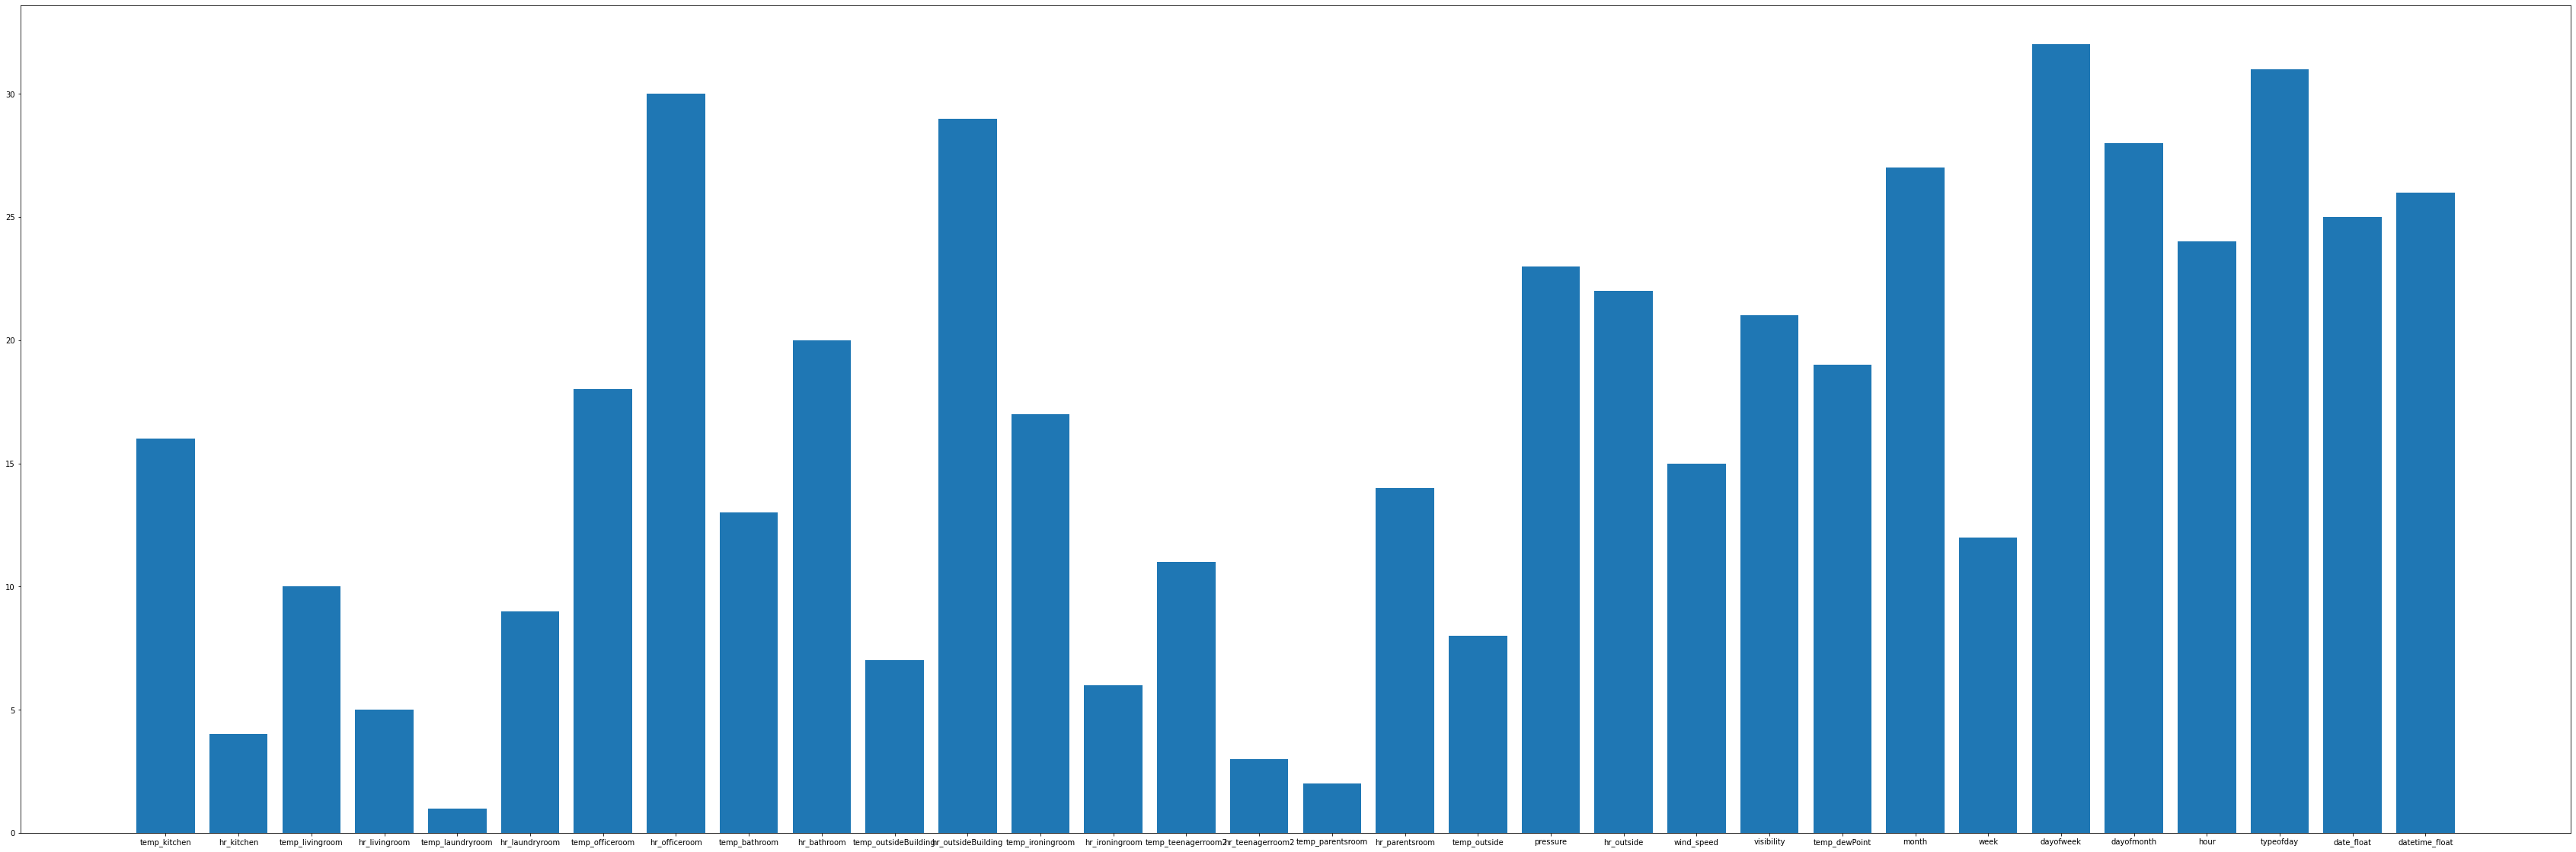

In [ ]:
rfe_mlr_withdate = train_x_scaled.drop(['energy_lag1', 'energy_trend', 'energy_seasonality', 'energy_residual', 
                                        'rv1', 'rv2',
                                        'date', 'datetime'], axis=1)
rfecv_mlr_withdate = RFE(estimator=LinearRegression(), step=1, n_features_to_select=1)
fit_rfe_mlr_withdate = rfecv_mlr_withdate.fit(rfe_mlr_withdate, train_y)

# plot feature rank
names_rfe_mlr_withdate = rfe_mlr_withdate.columns.values
ticks_rfe_mlr_withdate = [i for i in range(len(names_rfe_mlr_withdate))]
plt.figure(figsize=(60,20))
plt.bar(ticks_rfe_mlr_withdate, fit_rfe_mlr_withdate.ranking_)
plt.xticks(ticks_rfe_mlr_withdate, names_rfe_mlr_withdate)
plt.show()

In [ ]:
for x in range(0, len(names_rfe_mlr_withdate) - 1):
  print("{}: {}".format(names_rfe_mlr_withdate[x], fit_rfe_mlr_withdate.ranking_[x]))

temp_kitchen: 16
hr_kitchen: 4
temp_livingroom: 10
hr_livingroom: 5
temp_laundryroom: 1
hr_laundryroom: 9
temp_officeroom: 18
hr_officeroom: 30
temp_bathroom: 13
hr_bathroom: 20
temp_outsideBuilding: 7
hr_outsideBuilding: 29
temp_ironingroom: 17
hr_ironingroom: 6
temp_teenagerroom2: 11
hr_teenagerroom2: 3
temp_parentsroom: 2
hr_parentsroom: 14
temp_outside: 8
pressure: 23
hr_outside: 22
wind_speed: 15
visibility: 21
temp_dewPoint: 19
month: 27
week: 12
dayofweek: 32
dayofmonth: 28
hour: 24
typeofday: 31
date_float: 25


#### Base model with all variables

**Comments**: Multiple linear regression doesn't perform well with all variables. This suggests that the model should be trained with lag and time components from the target

In [ ]:
data = train_x_scaled.drop(['energy_lag1',
                            'datetime', 'date',
                            'energy_trend', 'energy_residual', 'energy_seasonality',
                            'rv1', 'rv2'], axis=1)
lr_base_all = LinearRegression()
lr_base_all.fit(data, train_y)

test_x = test_x_scaled.drop(['energy_lag1',
                             'datetime', 'date',
                             'energy_trend', 'energy_residual', 'energy_seasonality',
                             'rv1', 'rv2'], axis=1)

lr_base_all_pred_train_y = lr_base_all.predict(data)
lr_base_all_pred_test_y = lr_base_all.predict(test_x)
results_all = get_performance(train_y, lr_base_all_pred_train_y, test_y, lr_base_all_pred_test_y)

----- Training performance results -----

MAE: 56.048657094565925
MAPE: 0.6501202287777307
RMSE: 97.09498854844229
R-squared: 0.1419687138143696


----- Testing performance results -----

MAE: 55.9918871469905
MAPE: 0.6632259858468003
RMSE: 95.89023544098917
R-squared: 0.13897245245304857


#### Base model with lag and time components from target

**Comments**
* Base model with lag and time components outperforms the one with all variables
* Cannot say whether overfitting and underfitting happen as the the R-squared score from testing is greater than the one from training. Besides, other performance metric (MAE, MAPE, RMSE) for testing has better result compared to the training one

In [ ]:
data_lag = train_x_scaled.drop(['datetime', 'date'], axis=1)
lr_base_lag = LinearRegression()
lr_base_lag.fit(data_lag, train_y)

test_x_lag = test_x_scaled.drop(['datetime', 'date'], axis=1)

lr_base_lag_pred_train_y = lr_base_lag.predict(data_lag)
lr_base_lag_pred_test_y = lr_base_lag.predict(test_x_lag)
results_lag = get_performance(train_y, lr_base_lag_pred_train_y, test_y, lr_base_lag_pred_test_y)

----- Training performance results -----

MAE: 17.650094688078983
MAPE: 0.2250291041526072
RMSE: 33.9486335089322
R-squared: 0.8951051684804749


----- Testing performance results -----

MAE: 17.072744795579585
MAPE: 0.22481644471025022
RMSE: 31.76336226572036
R-squared: 0.9055240620790481


**Comments**: Although the residuals follow a normal distribution, the relationship between the energy and variables is not well presented by linear model

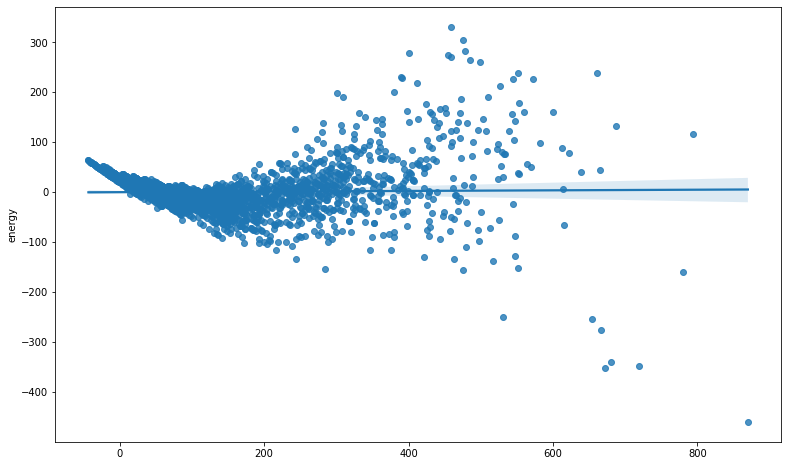

In [ ]:
residuals_lag_test = test_y - lr_base_lag_pred_test_y
sns.regplot(x = lr_base_lag_pred_test_y, y = residuals_lag_test, data = None, scatter = True)

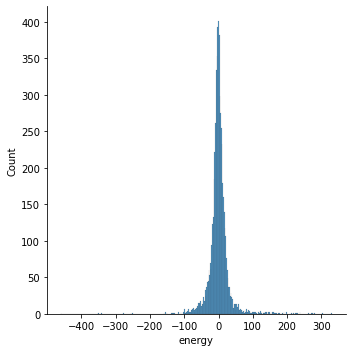

In [ ]:
sns.displot(test_y - lr_base_lag_pred_test_y)

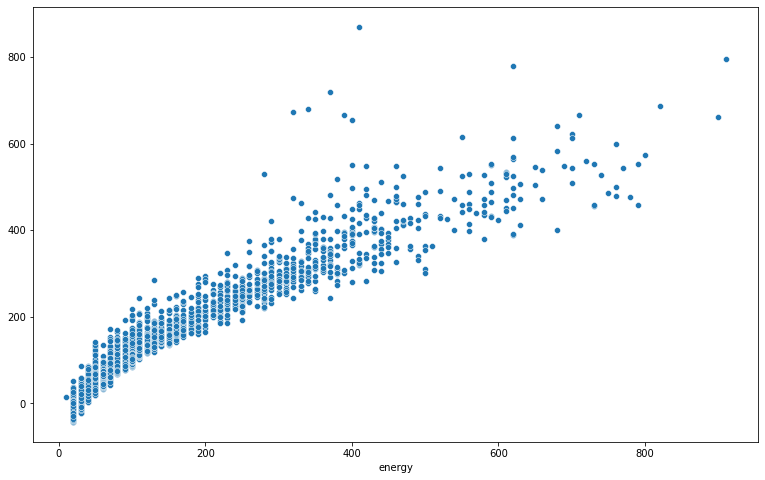

In [ ]:
sns.scatterplot(x=test_y, y=lr_base_lag_pred_test_y)

## **DecisionTreeRegressor**

#### Base Model

**Comments**: Overfitting as the training results are perfect but testing ones have higher error rate

In [ ]:
dtr_x_scaled = train_x_scaled.drop(['date', 'datetime'], axis=1)
dtr_base = DecisionTreeRegressor()
dtr_base = dtr_base.fit(dtr_x_scaled, train_y)

dtr_base_test_x = test_x_scaled.drop(['date', 'datetime'], axis=1)

dtr_base_pred_train_y = dtr_base.predict(dtr_x_scaled)
dtr_base_pred_test_y = dtr_base.predict(dtr_base_test_x)
results = get_performance(train_y, dtr_base_pred_train_y, test_y, dtr_base_pred_test_y)

----- Training performance results -----

MAE: 0.0
MAPE: 0.0
RMSE: 0.0
R-squared: 1.0


----- Testing performance results -----

MAE: 8.610032089174126
MAPE: 0.07224949404441575
RMSE: 20.09183442359065
R-squared: 0.9621986371709363


In [ ]:
return_decision_tree_shape(dtr_base)

# Decision Tree Shape
Tree depth: 21
Tree nodes: 7437


#### Tuned Decision Tree for each parameter

**Comments**: Train each parameter to see the optimal range

* *max_depth*
  * Generalisation gap increases drastically
  * The model starts to overfit quickly
* *criterion*
  * Squared_error reduces the generalisation gap
  * It also has the best performance result
* *min_samples_split* and *min_samples_leaf*
  * Optimal range should be from 5 to 20
  * The higher value leads to worse results
* *max_leaf_nodes*
  * Higher values provide better result
  * However, the generalisation gap increases

# Best Model Performance Metrics
train_mean_fit_time: 0.35031733512878416
validation_mean_fit_time: 0.35031733512878416
train_std_fit_time: 0.004280317000580832
validation_std_fit_time: 0.004280317000580832
train_mean_score_time: 0.0037781715393066405
validation_mean_score_time: 0.0037781715393066405
train_std_score_time: 5.754268833619636e-05
validation_std_score_time: 5.754268833619636e-05
train_param_max_depth: 19.0
validation_param_max_depth: 19.0
train_mean_test_score: -9.576117256957222
validation_mean_test_score: -9.576117256957222
train_std_test_score: 0.6159576496896628
validation_std_test_score: 0.6159576496896628
train_rank_test_score: 1.0
validation_rank_test_score: 1.0
train_mean_train_score: -0.022751320341623183
validation_mean_train_score: -0.022751320341623183
train_std_train_score: 0.014063201540338119
validation_std_train_score: 0.014063201540338119
14    {'max_depth': 19}
Name: params, dtype: object
# Best Model Hyper Parameters
{'max_depth': 19}


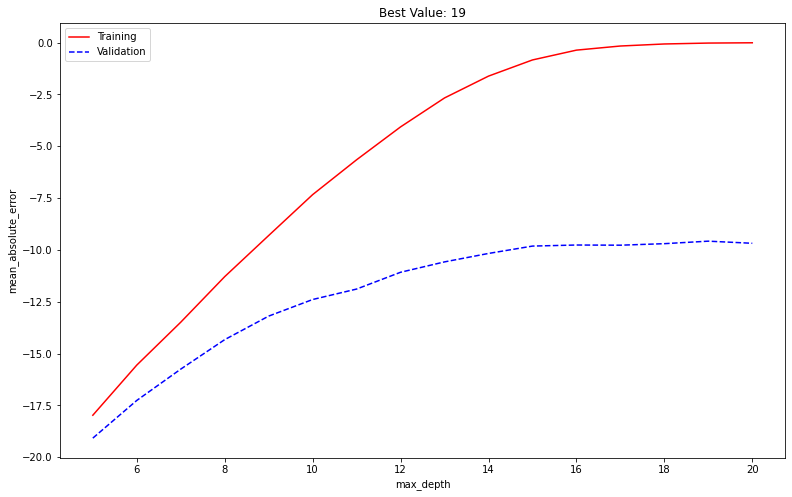

# Best Model Performance Metrics
train_mean_fit_time: 0.3511974811553955
validation_mean_fit_time: 0.3511974811553955
train_std_fit_time: 0.011439414726622835
validation_std_fit_time: 0.011439414726622835
train_mean_score_time: 0.003874540328979492
validation_mean_score_time: 0.003874540328979492
train_std_score_time: 0.0001744117542414597
validation_std_score_time: 0.0001744117542414597
train_mean_test_score: -9.600449772951407
validation_mean_test_score: -9.600449772951407
train_std_test_score: 0.4440116844671377
validation_std_test_score: 0.4440116844671377
train_rank_test_score: 1.0
validation_rank_test_score: 1.0
train_mean_train_score: 0.0
validation_mean_train_score: 0.0
train_std_train_score: 0.0
validation_std_train_score: 0.0
0    {'criterion': 'squared_error'}
Name: params, dtype: object
# Best Model Hyper Parameters
{'criterion': 'squared_error'}


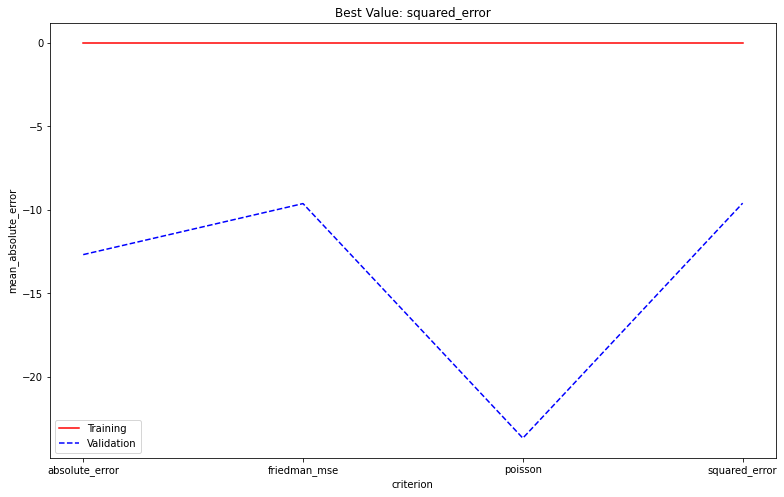

# Best Model Performance Metrics
train_mean_fit_time: 0.3410938739776611
validation_mean_fit_time: 0.3410938739776611
train_std_fit_time: 0.004527951756173032
validation_std_fit_time: 0.004527951756173032
train_mean_score_time: 0.0036870956420898436
validation_mean_score_time: 0.0036870956420898436
train_std_score_time: 0.00011550816944434303
validation_std_score_time: 0.00011550816944434303
train_mean_test_score: -9.59267432501953
validation_mean_test_score: -9.59267432501953
train_std_test_score: 0.4630170172262429
validation_std_test_score: 0.4630170172262429
train_rank_test_score: 1.0
validation_rank_test_score: 1.0
train_mean_train_score: -2.1125802120416077
validation_mean_train_score: -2.1125802120416077
train_std_train_score: 0.07238237114848571
validation_std_train_score: 0.07238237114848571
2    {'min_samples_split': 7}
Name: params, dtype: object
# Best Model Hyper Parameters
{'min_samples_split': 7}


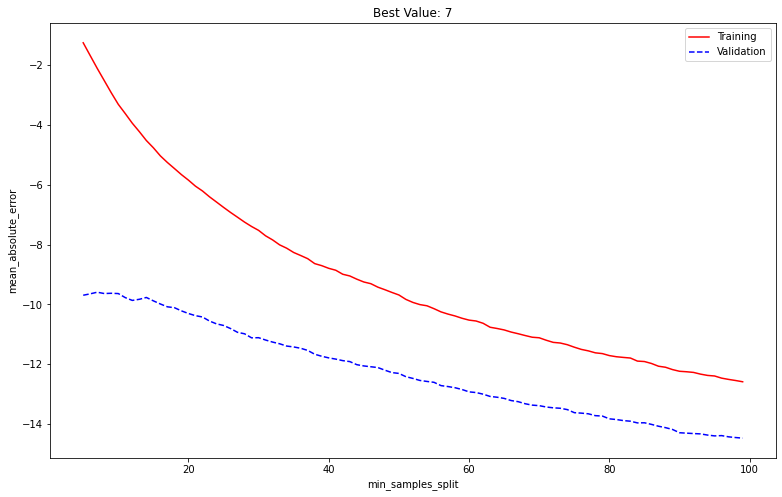

# Best Model Performance Metrics
train_mean_fit_time: 0.3209416389465332
validation_mean_fit_time: 0.3209416389465332
train_std_fit_time: 0.006212467981845935
validation_std_fit_time: 0.006212467981845935
train_mean_score_time: 0.0036086559295654295
validation_mean_score_time: 0.0036086559295654295
train_std_score_time: 0.00011110391739279492
validation_std_score_time: 0.00011110391739279492
train_param_min_samples_leaf: 5.0
validation_param_min_samples_leaf: 5.0
train_mean_test_score: -9.710347031414534
validation_mean_test_score: -9.710347031414534
train_std_test_score: 0.4350066672917228
validation_std_test_score: 0.4350066672917228
train_rank_test_score: 1.0
validation_rank_test_score: 1.0
train_mean_train_score: -4.727628644315106
validation_mean_train_score: -4.727628644315106
train_std_train_score: 0.08071285133917173
validation_std_train_score: 0.08071285133917173
0    {'min_samples_leaf': 5}
Name: params, dtype: object
# Best Model Hyper Parameters
{'min_samples_leaf': 5}


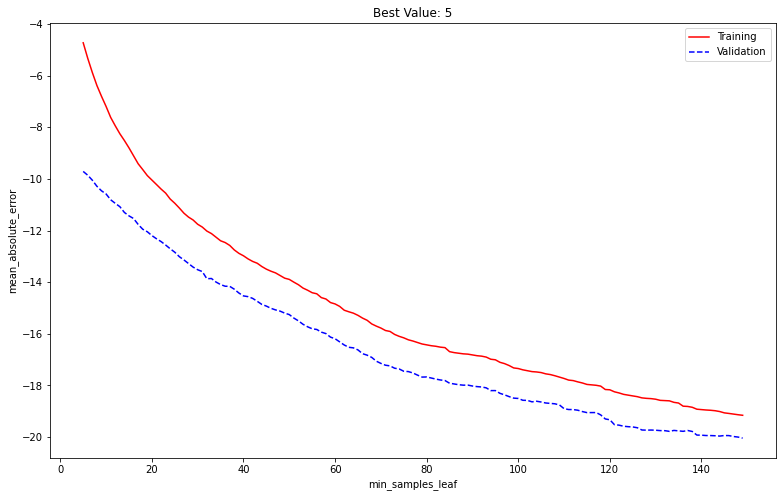

# Best Model Performance Metrics
train_mean_fit_time: 0.35058889389038084
validation_mean_fit_time: 0.35058889389038084
train_std_fit_time: 0.011104497602656995
validation_std_fit_time: 0.011104497602656995
train_mean_score_time: 0.00400073528289795
validation_mean_score_time: 0.00400073528289795
train_std_score_time: 0.0005207905164899142
validation_std_score_time: 0.0005207905164899142
train_mean_test_score: -9.600449772951407
validation_mean_test_score: -9.600449772951407
train_std_test_score: 0.4440116844671377
validation_std_test_score: 0.4440116844671377
train_rank_test_score: 1.0
validation_rank_test_score: 1.0
train_mean_train_score: 0.0
validation_mean_train_score: 0.0
train_std_train_score: 0.0
validation_std_train_score: 0.0
0      {'max_features': None}
1    {'max_features': 'auto'}
Name: params, dtype: object
# Best Model Hyper Parameters
{'max_features': None}


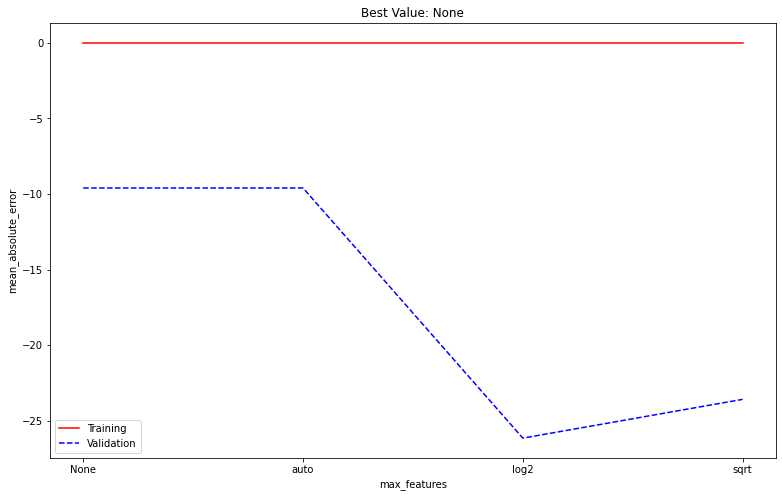

# Best Model Performance Metrics
train_mean_fit_time: 0.21248235702514648
validation_mean_fit_time: 0.21248235702514648
train_std_fit_time: 0.005462241192302923
validation_std_fit_time: 0.005462241192302923
train_mean_score_time: 0.003292226791381836
validation_mean_score_time: 0.003292226791381836
train_std_score_time: 9.451516321717545e-05
validation_std_score_time: 9.451516321717545e-05
train_param_max_leaf_nodes: 149.0
validation_param_max_leaf_nodes: 149.0
train_mean_test_score: -14.620493827443104
validation_mean_test_score: -14.620493827443104
train_std_test_score: 0.43423751343254446
validation_std_test_score: 0.43423751343254446
train_rank_test_score: 1.0
validation_rank_test_score: 1.0
train_mean_train_score: -11.694806751360122
validation_mean_train_score: -11.694806751360122
train_std_train_score: 0.12596709986398175
validation_std_train_score: 0.12596709986398175
144    {'max_leaf_nodes': 149}
Name: params, dtype: object
# Best Model Hyper Parameters
{'max_leaf_nodes': 149

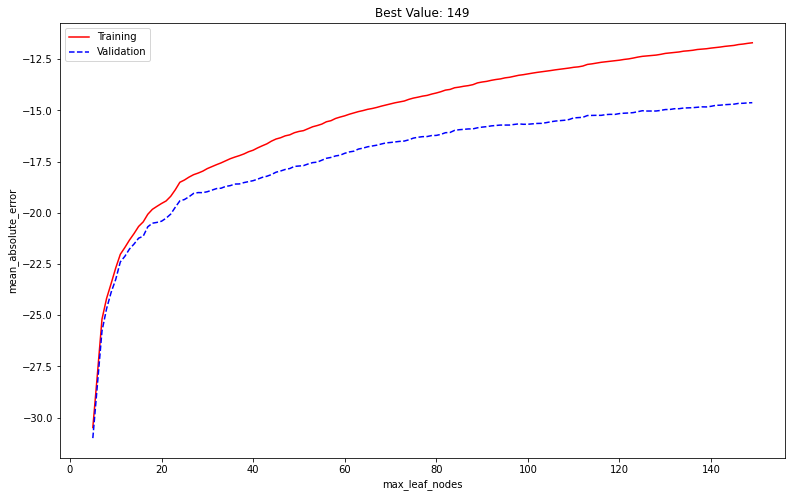

In [ ]:
# Define set of class weights for parameter tuning
distributions = dict(
    max_depth=range(5,21),
    criterion=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    min_samples_split=range(5,100),
    min_samples_leaf=range(5,150),
    max_features=[None,'auto','sqrt','log2'],
    max_leaf_nodes=range(5,150),
)

# Iterate over each hyper parameter

for param,dist in distributions.items():
    # Define randomised search cross validation
    clf = GridSearchCV(
        estimator=DecisionTreeRegressor(random_state=0),
        param_grid={param:dist},
        scoring='neg_mean_absolute_error',
        cv=5,
        return_train_score=True,
        refit='mean_absolute_error'
    )
    # Fit model
    g_search = clf.fit(dtr_x_scaled,train_y)
    return_gsearch_model_summary(g_search)
    generate_model_single_hyperparameter_tuning_plot(g_search)
    # Return model summary
    # Plot hyper parameter tuning dynamics

#### Tuned all parameters together for Decision Tree

In [ ]:
distributions = dict()
# Define randomised search cross validation
# No distributions, so only target classifier with defined parameters will be fit
gsearch_dtr_base = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=distributions,
    scoring='neg_mean_absolute_error',
    cv=5,
    return_train_score=True,
    refit='mean_absolute_error',
)
# Fit model
gsearch_dtr_base = gsearch_dtr_base.fit(dtr_x_scaled,train_y)
# Add model summary to records
model_summary_df = return_gsearch_model_summary_all_params(gsearch_dtr_base)
# Return pipeline
gsearch_dtr_base

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), param_grid={},
             refit='mean_absolute_error', return_train_score=True,
             scoring='neg_mean_absolute_error')

In [ ]:
distributions = dict(
    max_depth=[5,7,9,11,13,15,17,19],
    min_samples_split=[5,7,10,12,15,17,20],
    min_samples_leaf=[4,6,9,11,14,16,19],
    max_leaf_nodes=[10,15,20,25,30],
)
# Define randomised search cross validation
clf = GridSearchCV(
    estimator=DecisionTreeRegressor(criterion='squared_error'),
    param_grid=distributions,
    scoring='neg_mean_absolute_error',
    cv=5,
    return_train_score=True,
    refit='mean_absolute_error',
    n_jobs=100,
    verbose=1
)
# Fit model
g_search_tuned = clf.fit(dtr_x_scaled,train_y)
# Add model summary to records
model_summary_df = pd.concat(
    [
        model_summary_df,
        return_gsearch_model_summary_all_params(g_search_tuned)
    ],
    ignore_index=True
)

Fitting 5 folds for each of 1960 candidates, totalling 9800 fits


# Best Model Performance Metrics
train_mean_fit_time: 2.7919065611703053
validation_mean_fit_time: 2.7919065611703053
train_std_fit_time: 0.12574777025614461
validation_std_fit_time: 0.12574777025614461
train_mean_score_time: 0.06810815772231746
validation_mean_score_time: 0.06810815772231746
train_std_score_time: 0.013487094800391657
validation_std_score_time: 0.013487094800391657
train_param_max_depth: 13.0
validation_param_max_depth: 13.0
train_param_max_leaf_nodes: 30.0
validation_param_max_leaf_nodes: 30.0
train_param_min_samples_leaf: 19.0
validation_param_min_samples_leaf: 19.0
train_mean_test_score: -18.67046819539633
validation_mean_test_score: -18.67046819539633
train_std_test_score: 0.7608489258003857
validation_std_test_score: 0.7608489258003857
train_rank_test_score: 1.0
validation_rank_test_score: 1.0
train_mean_train_score: -17.77908861910431
validation_mean_train_score: -17.77908861910431
train_std_train_score: 0.19705800563573148
validation_std_train_score: 0.197058005

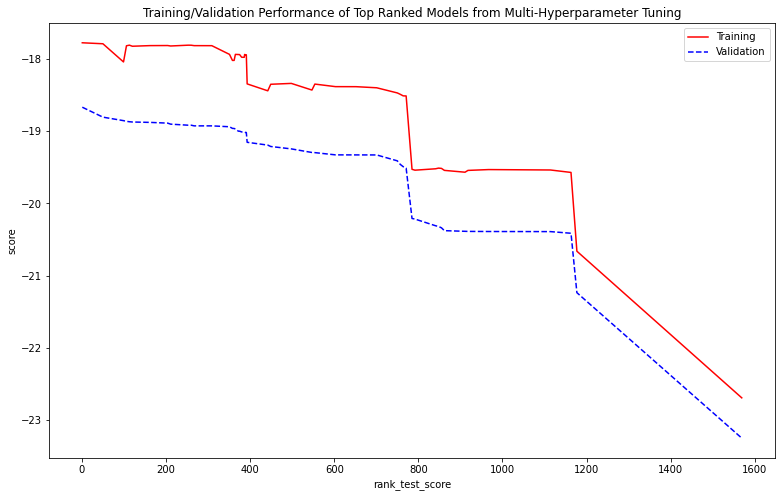

In [ ]:
# Return model score summary
return_gsearch_model_summary(g_search_tuned)
# Return tree shape
return_decision_tree_shape_gsearch(g_search_tuned)
# Return multi hyper parameter tuning dynamics
render_multi_hyperparameter_tuning_dynamics_plot(g_search_tuned)

# Plot feature importance
#generate_feature_importance_plot(clf.best_estimator_['classifier'],X_train_scoring,"{0} Feature Importance".format(model_name))

#### Incremental model

**Comments**: The results are still poor and have not been improved much compared to the base model

In [ ]:
dtr_incre = DecisionTreeRegressor(criterion='squared_error',
                                  max_depth=7,
                                  min_samples_leaf=19,
                                  min_samples_split=5,
                                  max_leaf_nodes=30)
dtr_incre = dtr_base.fit(dtr_x_scaled, train_y)

dtr_incre_test_x = test_x_scaled.drop(['date', 'datetime'], axis=1)

dtr_incre_pred_train_y = dtr_incre.predict(dtr_x_scaled)
dtr_incre_pred_test_y = dtr_incre.predict(dtr_incre_test_x)
results_incre = get_performance(train_y, dtr_incre_pred_train_y, test_y, dtr_incre_pred_test_y)

----- Training performance results -----

MAE: 0.0
MAPE: 0.0
RMSE: 0.0
R-squared: 1.0


----- Testing performance results -----

MAE: 8.767100152001351
MAPE: 0.07309892509963914
RMSE: 20.75463659146822
R-squared: 0.9596634692094691


In [ ]:
get_tree_2_plot(dtr_incre)

Output hidden; open in https://colab.research.google.com to view.

## **MultiLayerPerceptron (MLP)**

**Comments**: Similar to the base model with the similar parameters, the moodel is overfitting and is not able to predict properly on the test data. But given the excellent performance of the Model 3, we do not need to tune the parameters any further. We can take Model 3 as the best MLP model, and possibly the best choice for the project

In [ ]:
#Install tensorflow library. the tf version is higher than 2.0.0. It is!
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
tf.__version__

'2.8.0'

In [ ]:
#below sections will include some data processing and mdoeling pre-processing to ensure data is in the right format for neural network
#1. feature scaling
#2. choice of parameters such as optimizer, layer parameters, epocs, learning_rate, verbose etc.
#3. to enable usage of the relevant performance metrics

#rescale y data as MLP requires y data to be in a range of (0, 1) andvalues that are not normalized or standardized (i.e. >>1) can lead to low performance

#For some of the iterations with unscaled y data, we got output as nan

attributes = ['energy']

train_y_scaled = pd.DataFrame(train_y.copy())

quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           random_state=0,n_quantiles=599).fit(train_y_scaled.loc[:, attributes])
train_y_scaled.loc[:, attributes] = quantile_transformer.transform(train_y_scaled.loc[:, attributes])

minmax_scaler = MinMaxScaler().fit(train_y_scaled.loc[:,attributes])
train_y_scaled.loc[:, attributes] = minmax_scaler.transform(train_y_scaled.loc[:,attributes])

In [ ]:
#rescale x variable 'energy_lag1' as it has not been scaled yet, and having values that are not in scale with other varibales (which ahve been scaled down to a range of (0, 1))

#In initial iterations, the output ended up predicting nan or the same value for the entire test data

attributes = ['energy_lag1'] ##add seasonality, residuals and any other varibales that may not have been scaled previously

quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           random_state=0,n_quantiles=599).fit(train_x_scaled.loc[:, attributes])
train_x_scaled.loc[:, attributes] = quantile_transformer.transform(train_x_scaled.loc[:, attributes])

minmax_scaler = MinMaxScaler().fit(data_x_scaled.loc[:,attributes])
train_x_scaled.loc[:, attributes] = minmax_scaler.transform(train_x_scaled.loc[:,attributes])

#### Model 1: Base model with all variables (epocs=1500, dense(1000-sigmoid), dense(1), adam(0.01)

In [ ]:
#create copies of data specifically for mlp
train_x_scaled_mlp = train_x_scaled.copy()
train_y_mlp = train_y_scaled.copy()

In [ ]:
#select variables to be loaded into the neural net
print(train_x_scaled_mlp.columns)
train_x_scaled_mlp = train_x_scaled_mlp.drop(columns = ['datetime', 'date'], axis = 1)
#train_x_scaled_mlp = train_x_scaled_mlp[['temp_kitchen', 'month', 'week', 'dayofweek', 'hour', 'dayofmonth', 'energy_lag1']]

Index(['datetime', 'temp_kitchen', 'hr_kitchen', 'temp_livingroom',
       'hr_livingroom', 'temp_laundryroom', 'hr_laundryroom',
       'temp_officeroom', 'hr_officeroom', 'temp_bathroom', 'hr_bathroom',
       'temp_outsideBuilding', 'hr_outsideBuilding', 'temp_ironingroom',
       'hr_ironingroom', 'temp_teenagerroom2', 'hr_teenagerroom2',
       'temp_parentsroom', 'hr_parentsroom', 'temp_outside', 'pressure',
       'hr_outside', 'wind_speed', 'visibility', 'temp_dewPoint', 'rv1', 'rv2',
       'month', 'week', 'dayofweek', 'dayofmonth', 'hour', 'date', 'typeofday',
       'date_float', 'datetime_float', 'energy_trend', 'energy_seasonality',
       'energy_residual', 'energy_lag1'],
      dtype='object')


In [ ]:

#reset index for the variables before being merged and converted to a ndarray 
train_x_scaled_mlp.reset_index(drop=True, inplace=True)
train_y_mlp.reset_index(drop=True, inplace=True)


#convert datetime64 variables to float (mlp doesnt take dt64 columns) 

#use this code only if 'datetime' and 'date' columsn are selected as x variables for neural network
#train_x_scaled_mlp.datetime = train_x_scaled_mlp.datetime.values.astype('float')
#train_x_scaled_mlp.date = train_x_scaled_mlp.date.values.astype('float')

In [ ]:
#import array package
from numpy import array

#convert entire dataset to float for consistency. upto this point there are only int and float columns. make all float
train_x_scaled_mlp = train_x_scaled_mlp.astype('float32')

#add x data and y data together for creating stack of sequences (see sequences below)
train_scaled_mlp = train_x_scaled_mlp

train_scaled_mlp = pd.concat([train_scaled_mlp, train_y_mlp], axis=1)

#convert dataframe into stack of sequences
train_scaled_mlp = train_scaled_mlp.to_numpy()

In [ ]:
# split a multivariate sequence into samples
#this particularly helps if we want to include values at previous lag periods (t-1, t-2, t-3 etc) of all variables in predicting target at time t
#if required, increase the n_steps to 2, 3, 4 respectively. currently hardcoded as 1 below
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

mlp_data_x, mlp_data_y = split_sequences(train_scaled_mlp, 1)


#use the below code if multiple timestamps are required for 1 prediction (see baove comment). provide n_input value accordingly. the code actually calculates the n_input directly
#in current implementation we just use values at time t, and not values at other time stamps such as t-1 and t-2 etc.
n_input = mlp_data_x.shape[1] * mlp_data_x.shape[2]
mlp_data_x = mlp_data_x.reshape((mlp_data_x.shape[0], n_input))

In [ ]:
#Create prediction data (x variables)

#add this after the rescaling x variable 'lag'  (might lead to error if this is run before the below code. currently, the scaling below handles it. 
#but for consistency, include to the main code of feature scaling)
test_x_scaled_mlp = test_x_scaled.copy()

#rescale x variable 'energy_lag1 
attributes = ['energy_lag1'] ##add seasonality, residuals and all

quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           random_state=0,n_quantiles=599).fit(test_x_scaled_mlp.loc[:, attributes])
test_x_scaled_mlp.loc[:, attributes] = quantile_transformer.transform(test_x_scaled_mlp.loc[:, attributes])

minmax_scaler = MinMaxScaler().fit(data_x_scaled.loc[:,attributes])
test_x_scaled_mlp.loc[:, attributes] = minmax_scaler.transform(test_x_scaled_mlp.loc[:,attributes])

#select variables to be loaded into the neural net
#mirror above selection for train data
test_x_scaled_mlp = test_x_scaled_mlp.drop(columns=['datetime', 'date'], axis=1)
#test_x_scaled_mlp = test_x_scaled_mlp[['temp_kitchen', 'month', 'week', 'dayofweek', 'hour', 'dayofmonth', 'energy_lag1']]

#reset index
test_x_scaled_mlp.reset_index(drop=True, inplace=True)

#convert entire dataset to float for consistency. upto this ppoint there are only int and float columns
test_x_scaled_mlp = test_x_scaled_mlp.astype('float32')

#convert dataframe into stack of sequences
test_x_scaled_mlp = test_x_scaled_mlp.to_numpy()

In [ ]:
#create prediction data (y variable)
#rescale y data
attributes = ['energy'] #include in feature scaling code for consistency

test_y_scaled = pd.DataFrame(test_y.copy())

quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           random_state=0,n_quantiles=599).fit(test_y_scaled.loc[:, attributes])
test_y_scaled.loc[:, attributes] = quantile_transformer.transform(test_y_scaled.loc[:, attributes])

minmax_scaler = MinMaxScaler().fit(test_y_scaled.loc[:,attributes])
test_y_scaled.loc[:, attributes] = minmax_scaler.transform(test_y_scaled.loc[:,attributes])

In [ ]:
#first base model run (base model: mlp_model2),
# including all x variables except 'datetime' and 'date'

#install tf package and import keras functions
mlp_model1 = tf.keras.models.Sequential()

#initialize model and add 'layers' to the Multi 'Layer' Perceptron (MLP) model
mlp_model1.add(tf.keras.layers.Dense(1000, activation = 'sigmoid'))
mlp_model1.add(tf.keras.layers.Dense(1))

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

mlp_model1.compile(optimizer=adam, loss='mse')

mlp_model1.fit(mlp_data_x, mlp_data_y, epochs=1500, verbose=1)

Epoch 1/1500
432/432 [==============================] - 2s 2ms/step - loss: 0.3807
Epoch 2/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 3/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 4/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 5/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 6/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 7/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 8/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 9/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 10/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0020
Epoch 11/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 12/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0016
E

In [ ]:
#Performance analysis

#predict for train data
yhat_train_mlp_model1 = mlp_model1.predict(train_x_scaled_mlp, verbose=1)

#predict for test data
yhat_test_mlp_model1 = mlp_model1.predict(test_x_scaled_mlp, verbose=1)

#analyze model performance

#train
train_mse_mlp_model1 = mlp_model1.evaluate(train_x_scaled_mlp, train_y_scaled, verbose=0)
print('train_mse: ',train_mse_mlp_model1) #0.002732

#test
test_mse_mlp_model1 = mlp_model1.evaluate(test_x_scaled_mlp, test_y_scaled, verbose=0)
print('test_mse: ',test_mse_mlp_model1) #0.002557

#compute r2_score (use full performance metric function later)

#r2 for train
print('train_r2: ', r2_score(train_y_scaled, pd.Series(yhat_train_mlp_model1.squeeze())))    #0.6965

#r2 for test
print('test_r2: ', r2_score(test_y_scaled, pd.Series(yhat_test_mlp_model1.squeeze())))      #0.7145

186/186 [==============================] - 0s 2ms/step
train_mse:  0.0001726799237076193
test_mse:  0.00011437985085649416
train_r2:  0.9808201623952076
test_r2:  0.9872322329839402


In [ ]:
#run performance analysis module (all metrics)
results_mlp_model1 = get_performance(train_y_scaled, pd.Series(yhat_train_mlp_model1.squeeze()), test_y_scaled, pd.Series(yhat_test_mlp_model1.squeeze()))

----- Training performance results -----

MAE: 0.007157491443013655
MAPE: 437971635693.2604
RMSE: 0.013140772951572783
R-squared: 0.9808201623952076


----- Testing performance results -----

MAE: 0.0072050732292835125
MAPE: 129883159560.48958
RMSE: 0.010694848717292758
R-squared: 0.9872322329839402


#### Model 2: Incremental model with all variables (epocs=1500, dense(1000-sigmoid), dense(100-sigmoid), dense(1), adam(0.01)

In [ ]:
#first incremental model run (incremental model: mlp_model2),
# including all x variables except 'datetime' and 'date'

#install tf package and import keras functions
mlp_model2 = tf.keras.models.Sequential()

#initialize model and add 'layers' to the Multi 'Layer' Perceptron (MLP) model
mlp_model2.add(tf.keras.layers.Dense(1000, activation = 'sigmoid'))
mlp_model2.add(tf.keras.layers.Dense(100, activation = 'sigmoid'))
mlp_model2.add(tf.keras.layers.Dense(1))

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

mlp_model2.compile(optimizer=adam, loss='mse')

mlp_model2.fit(mlp_data_x, mlp_data_y, epochs=1500, verbose=1)

Epoch 1/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.2585
Epoch 2/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0092
Epoch 3/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0093
Epoch 4/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0095
Epoch 5/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0094
Epoch 6/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0095
Epoch 7/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0099
Epoch 8/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0103
Epoch 9/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0099
Epoch 10/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0104
Epoch 11/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0103
Epoch 12/1500
432/432 [==============================] - 2s 4ms/step - loss: 0.0109
E

In [ ]:
#Performance analysis

#predict for train data
yhat_train_mlp_model2 = mlp_model2.predict(train_x_scaled_mlp, verbose=1)

#predict for test data
yhat_test_mlp_model2 = mlp_model2.predict(test_x_scaled_mlp, verbose=1)

#analyze model performance

#train
train_mse_mlp_model2 = mlp_model2.evaluate(train_x_scaled_mlp, train_y_scaled, verbose=0)
print('train_mse: ',train_mse_mlp_model2) #0.002732

#test
test_mse_mlp_model2 = mlp_model2.evaluate(test_x_scaled_mlp, test_y_scaled, verbose=0)
print('test_mse: ',test_mse_mlp_model2) #0.002557

#compute r2_score (use full performance metric function later)

#r2 for train
print('train_r2: ', r2_score(train_y_scaled, pd.Series(yhat_train_mlp_model2.squeeze())))    #0.6965

#r2 for test
print('test_r2: ', r2_score(test_y_scaled, pd.Series(yhat_test_mlp_model2.squeeze())))      #0.7145

186/186 [==============================] - 0s 2ms/step
train_mse:  0.00900563970208168
test_mse:  0.00896044448018074
train_r2:  -0.00027101897803727404
test_r2:  -0.00021968384111015204


In [ ]:
#run performance analysis module (all metrics)
results_mlp_model2 = get_performance(train_y_scaled, pd.Series(yhat_train_mlp_model2.squeeze()), test_y_scaled, pd.Series(yhat_test_mlp_model2.squeeze()))

----- Training performance results -----

MAE: 0.0761802315720915
MAPE: 1145799352179.0237
RMSE: 0.09489805071647968
R-squared: -0.00027101897803727404


----- Testing performance results -----

MAE: 0.07605725391963425
MAPE: 381887042512.2576
RMSE: 0.0946596446089494
R-squared: -0.00021968384111015204


**Comments**: Negative R-squared can indicate that the model is largely overfitting the training data, and isn't able to predict on the test data accurately. As seen below, the predicted y values are all the same value.
* Typically, this can be due to noise of the dataset, or a small dataset size, but as seen in the previous iteration, predictions very quite accurate (so is not a dataset issue)
* Likely due to over-learning of the 2 hidden 'dense' networks, one of which was additionally inserted in comparison to the above model. Thus, it can be intepreted that there is no point of adding more hidden layers

In [ ]:
#view predicted y values for test dataset
yhat_test_mlp_model2

array([[0.50207686],
       [0.50207686],
       [0.50207686],
       ...,
       [0.50207686],
       [0.50207686],
       [0.50207675]], dtype=float32)

#### Model 3: Base model with selected variables (feature selected) variables (epocs=1500, dense(1000-sigmoid), dense(1), adam(0.01)

In [ ]:
#create copies of data specifically for mlp
train_x_scaled_mlp = train_x_scaled.copy()
train_y_mlp = train_y_scaled.copy()

In [ ]:
#select variables to be loaded into the neural net [choose variables chosen during feature selection]
print(train_x_scaled_mlp.columns)
#train_x_scaled_mlp = train_x_scaled_mlp.drop(columns = ['datetime', 'date'], axis = 1)

temp_cols = [col for col in train_x_scaled_mlp.columns if 'temp' in col]
other_cols = ['energy_lag1', 'energy_trend', 'energy_seasonality', 'energy_residual', 
              'hr_outside', 'hr_parentsroom', 'hr_teenagerroom2', 'hr_ironingroom', 'hr_outsideBuilding',
              'dayofmonth', 'month', 'typeofday', 'hour']
temp_cols.extend(other_cols)

train_x_scaled_mlp = train_x_scaled_mlp[temp_cols]

Index(['datetime', 'temp_kitchen', 'hr_kitchen', 'temp_livingroom',
       'hr_livingroom', 'temp_laundryroom', 'hr_laundryroom',
       'temp_officeroom', 'hr_officeroom', 'temp_bathroom', 'hr_bathroom',
       'temp_outsideBuilding', 'hr_outsideBuilding', 'temp_ironingroom',
       'hr_ironingroom', 'temp_teenagerroom2', 'hr_teenagerroom2',
       'temp_parentsroom', 'hr_parentsroom', 'temp_outside', 'pressure',
       'hr_outside', 'wind_speed', 'visibility', 'temp_dewPoint', 'rv1', 'rv2',
       'month', 'week', 'dayofweek', 'dayofmonth', 'hour', 'date', 'typeofday',
       'date_float', 'datetime_float', 'energy_trend', 'energy_seasonality',
       'energy_residual', 'energy_lag1'],
      dtype='object')


In [ ]:
#reset index for the variables before being merged and converted to a ndarray 
train_x_scaled_mlp.reset_index(drop=True, inplace=True)
train_y_mlp.reset_index(drop=True, inplace=True)

In [ ]:
#import array package
from numpy import array

#convert entire dataset to float for consistency. upto this point there are only int and float columns. make all float
train_x_scaled_mlp = train_x_scaled_mlp.astype('float32')

#add x data and y data together for creating stack of sequences (see sequences below)
train_scaled_mlp = train_x_scaled_mlp

train_scaled_mlp = pd.concat([train_scaled_mlp, train_y_mlp], axis=1)

#convert dataframe into stack of sequences
train_scaled_mlp = train_scaled_mlp.to_numpy()

In [ ]:
# split a multivariate sequence into samples
#this particularly helps if we want to include values at previous lag periods (t-1, t-2, t-3 etc) of all variables in predicting target at time t
#if required, increase the n_steps to 2, 3, 4 respectively. currently hardcoded as 1 below
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
mlp_data_x, mlp_data_y = split_sequences(train_scaled_mlp, 1)

#use the below code if multiple timestamps are required for 1 prediction (see baove comment). provide n_input value accordingly. the code actually calculates the n_input directly
#in current implementation we just use values at time t, and not values at other time stamps such as t-1 and t-2 etc.
n_input = mlp_data_x.shape[1] * mlp_data_x.shape[2]
mlp_data_x = mlp_data_x.reshape((mlp_data_x.shape[0], n_input))

In [ ]:
#Create prediction data (x variables)

#add this after the rescaling x variable 'lag'  (might lead to error if this is run before the below code. currently, the scaling below handles it. 
#but for consistency, include to the main code of feature scaling)
test_x_scaled_mlp = test_x_scaled.copy()

#rescale x variable 'energy_lag1 
attributes = ['energy_lag1'] ##add seasonality, residuals and all

quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           random_state=0,n_quantiles=599).fit(test_x_scaled_mlp.loc[:, attributes])
test_x_scaled_mlp.loc[:, attributes] = quantile_transformer.transform(test_x_scaled_mlp.loc[:, attributes])

minmax_scaler = MinMaxScaler().fit(data_x_scaled.loc[:,attributes])
test_x_scaled_mlp.loc[:, attributes] = minmax_scaler.transform(test_x_scaled_mlp.loc[:,attributes])

#select variables to be loaded into the neural net [choose variables selected during feature selection]
#mirror above selection for train data

#test_x_scaled_mlp = test_x_scaled_mlp.drop(columns=['datetime', 'date'], axis=1)
temp_cols = [col for col in test_x_scaled_mlp.columns if 'temp' in col]
other_cols = ['energy_lag1', 'energy_trend', 'energy_seasonality', 'energy_residual', 
              'hr_outside', 'hr_parentsroom', 'hr_teenagerroom2', 'hr_ironingroom', 'hr_outsideBuilding',
              'dayofmonth', 'month', 'typeofday', 'hour']
temp_cols.extend(other_cols)

test_x_scaled_mlp = test_x_scaled_mlp[temp_cols]

#reset index
test_x_scaled_mlp.reset_index(drop=True, inplace=True)

#convert entire dataset to float for consistency. upto this ppoint there are only int and float columns
test_x_scaled_mlp = test_x_scaled_mlp.astype('float32')

#convert dataframe into stack of sequences
test_x_scaled_mlp = test_x_scaled_mlp.to_numpy()

In [ ]:
#create prediction data (y variable)
#rescale y data
attributes = ['energy'] #include in feature scaling code for consistency

test_y_scaled = pd.DataFrame(test_y.copy())

quantile_transformer = QuantileTransformer(output_distribution='normal',
                                           random_state=0,n_quantiles=599).fit(test_y_scaled.loc[:, attributes])
test_y_scaled.loc[:, attributes] = quantile_transformer.transform(test_y_scaled.loc[:, attributes])

minmax_scaler = MinMaxScaler().fit(test_y_scaled.loc[:,attributes])
test_y_scaled.loc[:, attributes] = minmax_scaler.transform(test_y_scaled.loc[:,attributes])

In [ ]:
# including selected x variables (feature selection) except 'datetime' and 'date'

#install tf package and import keras functions
mlp_model3 = tf.keras.models.Sequential()

#initialize model and add 'layers' to the Multi 'Layer' Perceptron (MLP) model
mlp_model3.add(tf.keras.layers.Dense(1000, activation = 'sigmoid'))
mlp_model3.add(tf.keras.layers.Dense(1))

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

mlp_model3.compile(optimizer=adam, loss='mse')

mlp_model3.fit(mlp_data_x, mlp_data_y, epochs=1500, verbose=1)

Epoch 1/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.1761
Epoch 2/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 3/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 4/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 5/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 6/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 7/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 8/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0032
Epoch 9/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 10/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 11/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 12/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0016
E

In [ ]:
#Performance analysis

#predict for train data
yhat_train_mlp_model3 = mlp_model3.predict(train_x_scaled_mlp, verbose=1)

#predict for test data
yhat_test_mlp_model3 = mlp_model3.predict(test_x_scaled_mlp, verbose=1)

#analyze model performance

#train
train_mse_mlp_model3 = mlp_model3.evaluate(train_x_scaled_mlp, train_y_scaled, verbose=0)
print('train_mse: ',train_mse_mlp_model3) #0.002732

#test
test_mse_mlp_model3 = mlp_model3.evaluate(test_x_scaled_mlp, test_y_scaled, verbose=0)
print('test_mse: ',test_mse_mlp_model3) #0.002557

#compute r2_score (use full performance metric function later)

#r2 for train
print('train_r2: ', r2_score(train_y_scaled, pd.Series(yhat_train_mlp_model3.squeeze())))    #0.6965

#r2 for test
print('test_r2: ', r2_score(test_y_scaled, pd.Series(yhat_test_mlp_model3.squeeze())))      #0.7145

186/186 [==============================] - 0s 1ms/step
train_mse:  6.038502397132106e-05
test_mse:  9.159842738881707e-05
train_r2:  0.9932929354702915
test_r2:  0.9897752263213674


In [ ]:
#run performance analysis module (all metrics)
results_mlp_model3 = get_performance(train_y_scaled, pd.Series(yhat_train_mlp_model3.squeeze()), test_y_scaled, pd.Series(yhat_test_mlp_model3.squeeze()))

----- Training performance results -----

MAE: 0.005487968721397014
MAPE: 190147403696.5469
RMSE: 0.007770781384029666
R-squared: 0.9932929354702915


----- Testing performance results -----

MAE: 0.006034465058623129
MAPE: 103082365967.75148
RMSE: 0.00957070704858085
R-squared: 0.9897752263213674


#### Model 4: Incremental model with selected variable (epocs=1500, dense(1000-sigmoid), dense(100-sigmoid), dense(1), adam(0.01)

In [ ]:
#third incremental model: mlp_model4),
# including selected x variables (feature selection) except 'datetime' and 'date'

#install tf package and import keras functions
mlp_model4 = tf.keras.models.Sequential()

#initialize model and add 'layers' to the Multi 'Layer' Perceptron (MLP) model
mlp_model4.add(tf.keras.layers.Dense(1000, activation = 'sigmoid'))
mlp_model4.add(tf.keras.layers.Dense(10, activation = 'sigmoid'))
mlp_model4.add(tf.keras.layers.Dense(1))

adam = tf.keras.optimizers.Adam(learning_rate=0.01)

mlp_model4.compile(optimizer=adam, loss='mse')

mlp_model4.fit(mlp_data_x, mlp_data_y, epochs=1500, verbose=1)

Epoch 1/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0361
Epoch 2/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0090
Epoch 3/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0090
Epoch 4/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 5/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 6/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 7/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 8/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 9/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 10/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 11/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 12/1500
432/432 [==============================] - 1s 2ms/step - loss: 0.0092
E

In [ ]:
#Performance analysis

#predict for train data
yhat_train_mlp_model4 = mlp_model4.predict(train_x_scaled_mlp, verbose=1)

#predict for test data
yhat_test_mlp_model4 = mlp_model4.predict(test_x_scaled_mlp, verbose=1)

#analyze model performance

#train
train_mse_mlp_model4 = mlp_model4.evaluate(train_x_scaled_mlp, train_y_scaled, verbose=0)
print('train_mse: ',train_mse_mlp_model4) #0.002732

#test
test_mse_mlp_model4 = mlp_model4.evaluate(test_x_scaled_mlp, test_y_scaled, verbose=0)
print('test_mse: ',test_mse_mlp_model4) #0.002557

#compute r2_score (use full performance metric function later)

#r2 for train
print('train_r2: ', r2_score(train_y_scaled, pd.Series(yhat_train_mlp_model4.squeeze())))    #0.6965

#r2 for test
print('test_r2: ', r2_score(test_y_scaled, pd.Series(yhat_test_mlp_model4.squeeze())))      #0.7145

186/186 [==============================] - 0s 2ms/step
train_mse:  0.009061533026397228
test_mse:  0.009014398790895939
train_r2:  -0.006478565946971937
test_r2:  -0.006242301869345157


In [ ]:
#run performance analysis module (all metrics)
results_mlp_model4 = get_performance(train_y_scaled, pd.Series(yhat_train_mlp_model4.squeeze()), test_y_scaled, pd.Series(yhat_test_mlp_model4.squeeze()))

----- Training performance results -----

MAE: 0.07626555005068089
MAPE: 1159663691759.8567
RMSE: 0.09519205752901291
R-squared: -0.006478565946971937


----- Testing performance results -----

MAE: 0.0761136863309228
MAPE: 386507931526.41266
RMSE: 0.0949442037322838
R-squared: -0.006242301869345157


{'MAE_test': 0.0761136863309228,
 'MAE_train': 0.07626555005068089,
 'MAPE_test': 386507931526.41266,
 'MAPE_train': 1159663691759.8567,
 'MSE_test': 0.009014401822357413,
 'MSE_train': 0.009061527816606905,
 'RMSE_test': 0.0949442037322838,
 'RMSE_train': 0.09519205752901291,
 'RSq_test': -0.006242301869345157,
 'RSq_train': -0.006478565946971937}

# **Performance Analysis**



*   **MultiLinearRegression**
 *    RFE is performed on MLR to extract the feature ranking. Interestingly, some time components which are indicated as insignificant such as hour (rank 24), typeofday (rank 31), etc. all are correlated to the target variable (from EDA and Correlation Matrix). It also happens for some temperature and humidity variables. Similarly, those weather variables are marked as not important
 * We firstly trained with all variables except for lagged and trend variables. However, the results obtained were extremely bad (r-squared is 0.14 and high error rate)
 * Training with lagged and trend variables improved the results significantly (r-squared is 0.91 on test data; MAE, MAPE and RMSE is 17.07, 0.22 and 31.76 respectively)
 * Residuals are calculated (the difference between the real and predicted values), there is no doubt that the relationship between target and other features is not well presented as the residuals are not normally distributed around the horizontal line

* **DecisionTreeRegressor**
 * As obtained from MLR, better results will be achieved if all variables (including lagged and trend) are employed. We initially run the base model with all variables. The results are better, however, overfitting happens because of perfect results for training data (r-squared is 1.00, others are 0.00) while testing results are not good
 * We then tuned parameters with k-fold cross validation to identify the appropriate range of learning rates. However, due to time consuming, this process is not well performed. As a result, although the tree complexity is reduced, the incremental model doesn’t improve the result that much (overfitting still happens). There is even no difference when comparing two models using r-squared (0.96), MAE (8.61 and 8.77), MAPE (0.07) and RMSE (20.09 and 20.75)

* **MultiLayerPerceptron**
 * We have run four models and usually got high MAPE. This is probably due to few errors when the target variable is scaled to nearly 0. However, other metrics (MAE, RMSE, R-squared) are well employed to evaluate this model
 * It is suggested that the incremental models with more dense layers don’t perform well due to overfitting. Although other performance metrics are pretty well (MAE is 0.08 and RMSE is 0.09 for testing data), the R-squared score is negative (-0.01)
 * Base models completely outperform with lower MAE and RMSE (0.01 on both training and testing dataset). Moreover, the base model on selected features achieves higher R-squared score compared to that of all variables (0.99 and 0.99 respectively). Probably, those features are correlated to the energy consumption, thereby impacting our model performance

 







# **Ultimate Judgement**

* In order to compare the performance of each model, we decided to employ RMSE and R-squared. The best model is the one with lowest RMSE and highest R-squared on both training and testing data
* MLR shows a pretty high RMSE (33.95 and 31.76 on training and testing data respectively) with lower R-squared score (0.90 and 0.91 for training and testing). Moreover, the relationship between independent and target feature doesn’t fit into a linear model
  * Heteroskedasticity happens with an unequal scatter of the residuals. Despite the normal distribution of residuals, some records with extremely high values reduces the performance
  * Probably the validity of MLR suffers from outliers
* DTR is overfitting with RMSE of 20.75 and R-squared of 0.96, which is an improvement over MLR but not by much
  * As obtained from EDA, temperature and and humidity variables are highly correlated among each other. This leads to the problem of multicollinearity when the tree greedily selects the best one out of them, which hides many aspects of the data. Observing the tree plot, some important temperature variables are selected last in the tree
  * Although parameter optimization is performed to increase the complexity, it appears that overfitting starts really quick due to regression problem with an increased computational complexity of the tree
* As we already compared different models of MLP from the Performance Analysis. In this section, the best MLP model (base model with 1 dense layer (1000) with selected features) will be compared with MLR and DTR models. Obviously, it shows a significant reduction of the RMSE compared to MLR and DTR (0.01, 31.76 and 20.75 respectively on testing data). R-squared score is also improved (0.99, 0.96 and 0.91 for MLP, DTR and MLR respectively)
* **Reasons for MLP outperforming other models**
  * MLR shows that the a non-linear model is a better choice, MLP can tackle that problem
  * Most of our input variables is continuous, which is more well fit into MLP model
  * MLP is known to provide an efficient mapping of input-output values based on its hidden layers providing a level of abstraction
  * It focuses on optimizing a loss metric, in this case MSE was used. Thus it iterated over 1500 epocs to minimize the error (MSE) and using the sigmoid optimizer
  * We explored multiple variations of different optimizers, learning rates, different count of dense layers and multiple epocs count in the process of identifying a really efficient base model. And running incremental models using selected features provided a better harmony between train-test performance as well as smaller errors
  * **Thus, we have chosen ‘MLP base model with selected variables’ to be the most appropriate model to be used in a real world setting**
